In [ ]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score
SEED = 42

In [ ]:
df=pd.read_excel('sleeep_apnea_data.xlsx')
df.head()

,Gender,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,AHI
0,M,0.0,14.0,29.065927,88.0,174.0,57.5,39.0,95.5,106.5,20.0,2.903226
1,M,0.0,8.0,26.989619,78.0,170.0,57.0,36.5,90.0,100.0,20.0,1.022727
2,M,0.0,16.0,23.939481,75.0,177.0,59.0,39.0,88.0,104.0,20.0,0.518359
3,M,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006
4,M,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006


### **DATA SET EXPLORE**:

In [ ]:
print ('Rows     : ', df.shape[0]) #  to show total no.of rows in dataset
print ('Columns  : ', df.shape[1]) #  to show total no.of columns(features) in dataset
print ('\nFeatures : \n', df.columns.tolist()) #  to show the features in dataset
print ('\nMissing values :  ', df.isnull().sum().values.sum()) #  to show total no.of missing values in dataset
print ('\nUnique values :  \n', df.nunique()) # to show total no.of unique values in each feature of dataset

Rows     :  5245
Columns  :  12

Features : 
 ['Gender', 'BQ', 'ESS', 'BMI', 'Weight', 'Height', 'Head', 'Neck', 'Waist', 'Buttock', 'Age', 'AHI']

Missing values :   5

Unique values :  
 Gender        2
BQ            4
ESS          31
BMI        2092
Weight      441
Height      120
Head        127
Neck        169
Waist       262
Buttock     212
Age          63
AHI        4387
dtype: int64


In [ ]:
df.info() # to show datatype of ecah feature in dataset
df.isnull().sum() # to show total no.of null values of features in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5245 entries, 0 to 5244
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Gender   5245 non-null   object 
 1   BQ       5243 non-null   float64
 2   ESS      5244 non-null   float64
 3   BMI      5245 non-null   float64
 4   Weight   5245 non-null   float64
 5   Height   5245 non-null   float64
 6   Head     5245 non-null   float64
 7   Neck     5245 non-null   float64
 8   Waist    5245 non-null   float64
 9   Buttock  5243 non-null   float64
 10  Age      5245 non-null   float64
 11  AHI      5245 non-null   float64
dtypes: float64(11), object(1)
memory usage: 491.8+ KB


Gender     0
BQ         2
ESS        1
BMI        0
Weight     0
Height     0
Head       0
Neck       0
Waist      0
Buttock    2
Age        0
AHI        0
dtype: int64

In [ ]:
df = df.dropna() #  drop the null values in datset
df.info()
print ('\nMissing values :  ', df.isnull().sum().values.sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5241 entries, 0 to 5244
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Gender   5241 non-null   object 
 1   BQ       5241 non-null   float64
 2   ESS      5241 non-null   float64
 3   BMI      5241 non-null   float64
 4   Weight   5241 non-null   float64
 5   Height   5241 non-null   float64
 6   Head     5241 non-null   float64
 7   Neck     5241 non-null   float64
 8   Waist    5241 non-null   float64
 9   Buttock  5241 non-null   float64
 10  Age      5241 non-null   float64
 11  AHI      5241 non-null   float64
dtypes: float64(11), object(1)
memory usage: 532.3+ KB

Missing values :   0


In [ ]:
df.describe() #  statstical data of the dataset

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,AHI
count,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000
mean,0.231826,10.177829,26.614692,75.509101,168.048941,56.433686,37.700609,91.202232,100.878859,45.359015,31.577799
std,0.442350,20.194986,5.353710,17.432065,8.150325,2.286324,4.195294,13.805898,9.733455,13.107217,28.132234
min,0.000000,0.000000,14.765497,37.000000,140.000000,36.500000,26.000000,56.000000,70.000000,20.000000,0.000000
25%,0.000000,6.000000,23.120624,64.000000,163.000000,55.000000,35.000000,83.000000,95.000000,35.000000,6.333333
50%,0.000000,10.000000,25.795918,74.000000,169.000000,56.500000,37.500000,90.000000,99.500000,44.000000,23.883495
75%,0.000000,14.000000,29.012346,85.000000,174.000000,58.000000,40.000000,98.500000,105.000000,55.000000,52.720000
max,9.000000,999.000000,60.232426,178.000000,198.000000,69.500000,60.000000,182.000000,179.000000,80.000000,143.922830


In [ ]:
dummies = pd.get_dummies(df.Gender) # a one hot encoding helps to convert object into numrecial values
dummies.head()

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
merged = pd.concat([df,dummies],axis='columns')
merged.head()

,Gender,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,AHI,F,M
0,M,0.0,14.0,29.065927,88.0,174.0,57.5,39.0,95.5,106.5,20.0,2.903226,0,1
1,M,0.0,8.0,26.989619,78.0,170.0,57.0,36.5,90.0,100.0,20.0,1.022727,0,1
2,M,0.0,16.0,23.939481,75.0,177.0,59.0,39.0,88.0,104.0,20.0,0.518359,0,1
3,M,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006,0,1
4,M,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006,0,1


In [ ]:
new_df = merged.drop(['Gender'], axis='columns')
new_df.head()

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,AHI,F,M
0,0.0,14.0,29.065927,88.0,174.0,57.5,39.0,95.5,106.5,20.0,2.903226,0,1
1,0.0,8.0,26.989619,78.0,170.0,57.0,36.5,90.0,100.0,20.0,1.022727,0,1
2,0.0,16.0,23.939481,75.0,177.0,59.0,39.0,88.0,104.0,20.0,0.518359,0,1
3,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006,0,1
4,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006,0,1


In [ ]:
new_df = new_df.drop(['F'], axis='columns')
new_df.head()

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,AHI,M
0,0.0,14.0,29.065927,88.0,174.0,57.5,39.0,95.5,106.5,20.0,2.903226,1
1,0.0,8.0,26.989619,78.0,170.0,57.0,36.5,90.0,100.0,20.0,1.022727,1
2,0.0,16.0,23.939481,75.0,177.0,59.0,39.0,88.0,104.0,20.0,0.518359,1
3,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006,1
4,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006,1


In [ ]:
new_df.M.value_counts()

1    3999
0    1242
Name: M, dtype: int64

In [ ]:
def fun(num): 
  
    if num>=30: 
        return 3
    elif num in range (15,30):
        return 2
    elif num in range (5,15):
        return 1
    else:
        return 0
    

In [ ]:
new_df['status']=new_df.AHI.apply(fun)
status=["Severe","Moderate","Mild","Normal"]

In [ ]:
new_df.head(10)

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,AHI,M,status
0,0.0,14.0,29.065927,88.0,174.0,57.5,39.0,95.5,106.5,20.0,2.903226,1,0
1,0.0,8.0,26.989619,78.0,170.0,57.0,36.5,90.0,100.0,20.0,1.022727,1,0
2,0.0,16.0,23.939481,75.0,177.0,59.0,39.0,88.0,104.0,20.0,0.518359,1,0
3,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006,1,0
4,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006,1,0
5,0.0,5.0,20.761246,60.0,170.0,56.0,35.0,68.0,90.0,20.0,0.693642,1,0
6,0.0,12.0,22.656114,68.2,173.5,57.0,34.5,76.5,97.0,20.0,1.730769,1,0
7,0.0,0.0,33.910035,98.0,170.0,57.0,39.0,108.0,123.0,20.0,73.861386,1,3
8,0.0,9.0,24.489796,75.0,175.0,58.0,37.0,91.0,100.0,21.0,6.646707,1,0
9,0.0,12.0,25.524316,72.9,169.0,56.5,38.5,88.0,97.5,21.0,2.763158,1,0


In [ ]:
final_df = new_df.drop(['AHI'], axis='columns')
final_df.head()

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
0,0.0,14.0,29.065927,88.0,174.0,57.5,39.0,95.5,106.5,20.0,1,0
1,0.0,8.0,26.989619,78.0,170.0,57.0,36.5,90.0,100.0,20.0,1,0
2,0.0,16.0,23.939481,75.0,177.0,59.0,39.0,88.0,104.0,20.0,1,0
3,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,1,0
4,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,1,0


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5241 entries, 0 to 5244
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BQ       5241 non-null   float64
 1   ESS      5241 non-null   float64
 2   BMI      5241 non-null   float64
 3   Weight   5241 non-null   float64
 4   Height   5241 non-null   float64
 5   Head     5241 non-null   float64
 6   Neck     5241 non-null   float64
 7   Waist    5241 non-null   float64
 8   Buttock  5241 non-null   float64
 9   Age      5241 non-null   float64
 10  M        5241 non-null   uint8  
 11  status   5241 non-null   int64  
dtypes: float64(10), int64(1), uint8(1)
memory usage: 496.5 KB


0    2903
3    2308
1      17
2      13
Name: status, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

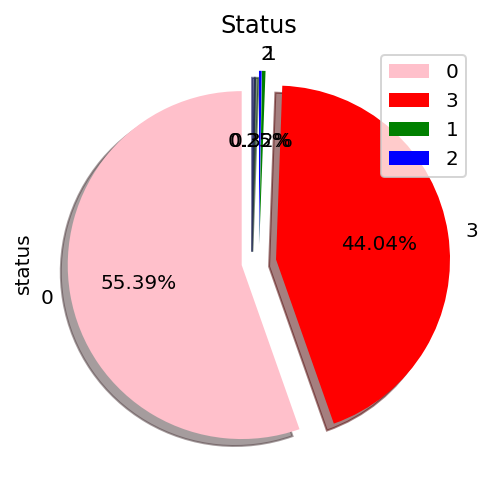

In [ ]:
print(final_df.status.value_counts())
color=['pink',"r","green","blue"]
final_df['status'].value_counts().plot.pie(colors=color,startangle=90, shadow=True,explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.2f%%').set_title('Status')
plt.legend()
plt.show

In [ ]:
a=(final_df.status.value_counts()[0] / final_df.status.count())*100
a=a.round(3)
print(a)
b=(final_df.status.value_counts()[1] / final_df.status.count())*100
b=b.round(3)
print(b)
c=(final_df.status.value_counts()[2] / final_df.status.count())*100
c=c.round(3)
print(c)
d=(final_df.status.value_counts()[3] / final_df.status.count())*100
d=d.round(3)
print(d)

55.39
0.324
0.248
44.037


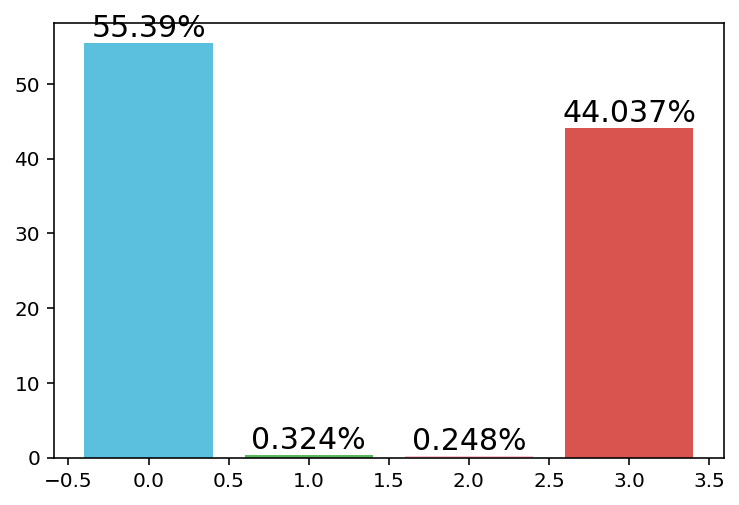

In [ ]:
LABELS = ["Normal", "Mild","Moderate","Severe"]
frequencies = (a,b,c,d)

plt.figure()
colors=['#5bc0de','#5cb85c','pink','#d9534f']
p1 = plt.bar(np.arange(len(frequencies)), frequencies,color=colors)

for rect1 in p1:
    height = rect1.get_height()
    plt.annotate( "{}%".format(height),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)

plt.show()


Text(0, 0.5, 'Frequency')

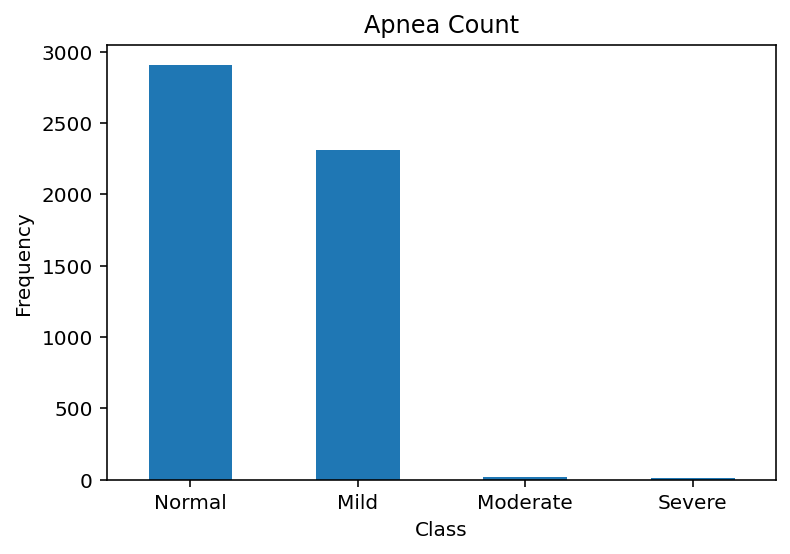

In [ ]:
LABELS = ["Normal", "Mild","Moderate","Severe"]

count_classes = pd.value_counts(final_df['status'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Apnea Count")

plt.xticks(range(4), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

#### OUTLIERS DETECTION AND REMOVING :

*   List item
*   List item




#### IQR TECHNIQUE

In [ ]:
final_df.shape

(5241, 12)

In [ ]:
#outlier detection using IQR for BQ feature
Q1 = final_df.BQ.quantile(0.05)
Q3 = final_df.BQ.quantile(0.95)
Q1, Q3

(0.0, 1.0)

In [ ]:
IQR = Q3 - Q1
IQR

1.0

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-1.5, 2.5)

In [ ]:
final_df[(final_df.BQ<lower_limit)|(final_df.BQ>upper_limit)]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
2545,9.0,0.0,24.622961,72.0,171.0,57.5,35.0,84.5,94.0,50.0,1,0
4626,5.0,2.0,17.146776,45.0,162.0,51.5,28.0,69.5,87.5,46.0,0,0


In [ ]:
df_no_outlier = final_df[(final_df.BQ>lower_limit)&(final_df.BQ<upper_limit)]
df_no_outlier.shape

(5239, 12)

In [ ]:
Q1 = df_no_outlier.ESS.quantile(0.05)
Q3 = df_no_outlier.ESS.quantile(0.95)
Q1, Q3

(0.0, 20.0)

In [ ]:
IQR = Q3 - Q1
IQR

20.0

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-30.0, 50.0)

In [ ]:
df_no_outlier[(df_no_outlier.ESS<lower_limit)|(df_no_outlier.ESS>upper_limit)]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
2049,1.0,999.0,20.242215,58.500000,170.0,55.5,36.5,71.0,89.0,45.0,1,0
3413,1.0,999.0,29.069767,86.000000,172.0,56.5,42.0,104.0,108.0,60.0,1,0
3649,1.0,79.0,24.807473,78.599998,178.0,63.0,42.0,94.0,98.5,64.0,1,0


In [ ]:
df_no_outlier = df_no_outlier[(df_no_outlier.ESS>lower_limit) &(df_no_outlier.ESS<upper_limit)]
df_no_outlier.shape

(5236, 12)

In [ ]:
Q1 = df_no_outlier.BMI.quantile(0.05)
Q3 = df_no_outlier.BMI.quantile(0.95)
print("Q1 VALUE - ",Q1, "Q3 VALUE - ",  Q3)
IQR = Q3 - Q1
print()
print("IQR VALUE",IQR)
print()
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit, upper_limit)

Q1 VALUE -  19.56823633379624 Q3 VALUE -  36.76590921689596

IQR VALUE 17.197672883099724

-6.228272990853345 62.56241854154555


In [ ]:
df_no_outlier[(df_no_outlier.BMI<lower_limit)|(df_no_outlier.BMI>upper_limit)]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status


In [ ]:
df_no_outlier = df_no_outlier[(df_no_outlier.BMI>lower_limit) &(df_no_outlier.BMI<upper_limit)]
df_no_outlier.shape

(5236, 12)

In [ ]:
Q1 = df_no_outlier.Weight.quantile(0.05)
Q3 = df_no_outlier.Weight.quantile(0.95)
print("Q1 VALUE - ",Q1, "Q3 VALUE - ",  Q3)
IQR = Q3 - Q1
print()
print("IQR VALUE",IQR)
print()
lower_limit = Q1 - 1*IQR
upper_limit = Q3 + 1*IQR
print(lower_limit, upper_limit)

Q1 VALUE -  50.0 Q3 VALUE -  106.0

IQR VALUE 56.0

-6.0 162.0


In [ ]:
df_no_outlier[(df_no_outlier.Weight<lower_limit)|(df_no_outlier.Weight>upper_limit)]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
152,0.0,7.0,60.232426,170.0,168.0,62.0,49.0,159.0,179.0,25.0,1,3
1200,0.0,10.0,53.737471,178.0,182.0,59.5,48.0,154.0,158.0,37.0,1,3


In [ ]:
df_no_outlier = df_no_outlier[(df_no_outlier.Weight>lower_limit) &(df_no_outlier.Weight<upper_limit)]
df_no_outlier.shape

(5234, 12)

In [ ]:
Q1 = df_no_outlier.Height.quantile(0.05)
Q3 = df_no_outlier.Height.quantile(0.95)
print("Q1 VALUE - ",Q1, "Q3 VALUE - ",  Q3)
IQR = Q3 - Q1
print()
print("IQR VALUE",IQR)
print()
lower_limit = Q1 - 1*IQR
upper_limit = Q3 + 1*IQR
print(lower_limit, upper_limit)

Q1 VALUE -  153.0 Q3 VALUE -  180.0

IQR VALUE 27.0

126.0 207.0


In [ ]:
df_no_outlier[(df_no_outlier.Height<lower_limit)|(df_no_outlier.Height>upper_limit)]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status


In [ ]:
df_no_outlier = df_no_outlier[(df_no_outlier.Height>lower_limit) &(df_no_outlier.Height<upper_limit)]
df_no_outlier.shape

(5234, 12)

In [ ]:
Q1 = df_no_outlier.Head.quantile(0.05)
Q3 = df_no_outlier.Head.quantile(0.95)
print("Q1 VALUE - ",Q1, "Q3 VALUE - ",  Q3)
IQR = Q3 - Q1
print()
print("IQR VALUE",IQR)
print()
lower_limit = Q1 - 1*IQR
upper_limit = Q3 + 1*IQR
print(lower_limit, upper_limit)

Q1 VALUE -  53.0 Q3 VALUE -  60.0

IQR VALUE 7.0

46.0 67.0


In [ ]:
df_no_outlier[(df_no_outlier.Head<lower_limit)|(df_no_outlier.Head>upper_limit)]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
29,0.0,18.0,25.180785,78.0,176.0,36.5,37.0,88.5,102.0,22.0,1,0
201,0.0,0.0,21.967120,62.0,168.0,42.8,33.5,78.0,92.5,26.0,1,0
291,0.0,14.0,22.340297,74.0,182.0,45.0,34.2,80.5,96.5,28.0,1,0
490,0.0,14.0,25.593737,68.0,163.0,45.0,36.5,87.5,94.0,31.0,1,0
565,0.0,16.0,40.745465,115.0,168.0,68.0,52.0,124.0,126.0,31.0,1,3
1425,1.0,10.0,25.142857,77.0,175.0,45.5,38.5,89.0,103.5,39.0,1,0
1446,0.0,16.0,20.478267,62.0,174.0,37.5,35.0,80.0,89.0,39.0,1,3
2028,0.0,3.0,26.827421,85.0,178.0,69.5,39.0,92.0,103.5,45.0,1,0
2809,1.0,11.0,29.745809,88.0,172.0,43.5,60.0,107.0,101.5,52.0,1,3
2931,0.0,7.0,24.977043,68.0,165.0,37.0,36.8,88.5,94.0,54.0,1,0


In [ ]:
df_no_outlier = df_no_outlier[(df_no_outlier.Head>lower_limit) &(df_no_outlier.Head<upper_limit)]
df_no_outlier.shape

(5213, 12)

In [ ]:
Q1 = df_no_outlier.Neck.quantile(0.05)
Q3 = df_no_outlier.Neck.quantile(0.95)
print("Q1 VALUE - ",Q1, "Q3 VALUE - ",  Q3)
IQR = Q3 - Q1
print()
print("IQR VALUE",IQR)
print()
lower_limit = Q1 - 1*IQR
upper_limit = Q3 + 1*IQR
print(lower_limit, upper_limit)
df_no_outlier[(df_no_outlier.Neck<lower_limit)|(df_no_outlier.Neck>upper_limit)]

Q1 VALUE -  30.5 Q3 VALUE -  45.0

IQR VALUE 14.5

16.0 59.5


,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status


In [ ]:
df_no_outlier = df_no_outlier[(df_no_outlier.Neck>lower_limit) &(df_no_outlier.Neck<upper_limit)]
df_no_outlier.shape

(5213, 12)

In [ ]:
Q1 = df_no_outlier.Waist.quantile(0.05)
Q3 = df_no_outlier.Waist.quantile(0.95)
print("Q1 VALUE - ",Q1, "Q3 VALUE - ",  Q3)
IQR = Q3 - Q1
print()
print("IQR VALUE",IQR)
print()
lower_limit = Q1 - 1*IQR
upper_limit = Q3 + 1*IQR
print(lower_limit, upper_limit)

Q1 VALUE -  69.0 Q3 VALUE -  116.0

IQR VALUE 47.0

22.0 163.0


In [ ]:
df_no_outlier[(df_no_outlier.Waist<lower_limit)|(df_no_outlier.Waist>upper_limit)]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
384,0.0,5.0,45.131715,139.8,176.0,57.0,45.0,182.0,106.0,29.0,1,0


In [ ]:
df_no_outlier = df_no_outlier[(df_no_outlier.Waist>lower_limit) &(df_no_outlier.Waist<upper_limit)]
df_no_outlier.shape

(5212, 12)

In [ ]:
Q1 = df_no_outlier.Buttock.quantile(0.05)
Q3 = df_no_outlier.Buttock.quantile(0.95)
print("Q1 VALUE - ",Q1, "Q3 VALUE - ",  Q3)
IQR = Q3 - Q1
print()
print("IQR VALUE",IQR)
print()
lower_limit = Q1 - 1*IQR
upper_limit = Q3 + 1*IQR
print(lower_limit, upper_limit)
df_no_outlier[(df_no_outlier.Buttock<lower_limit)|(df_no_outlier.Buttock>upper_limit)]

Q1 VALUE -  88.0 Q3 VALUE -  119.0

IQR VALUE 31.0

57.0 150.0


,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
919,0.0,16.0,60.204237,158.0,162.0,58.5,48.0,160.0,155.0,34.0,1,3
920,0.0,16.0,60.204237,158.0,162.0,58.5,48.0,160.0,155.0,34.0,1,3


In [ ]:
df_no_outlier = df_no_outlier[(df_no_outlier.Buttock>lower_limit) &(df_no_outlier.Buttock<upper_limit)]
df_no_outlier.shape

(5208, 12)

In [ ]:
df1=df_no_outlier 
print(df1.head())
print(df1.shape)

    BQ   ESS        BMI  Weight  Height  Head  Neck  Waist  Buttock   Age  M  \
0  0.0  14.0  29.065927    88.0   174.0  57.5  39.0   95.5    106.5  20.0  1   
1  0.0   8.0  26.989619    78.0   170.0  57.0  36.5   90.0    100.0  20.0  1   
2  0.0  16.0  23.939481    75.0   177.0  59.0  39.0   88.0    104.0  20.0  1   
3  0.0  15.0  22.129740    67.0   174.0  57.0  35.0   74.0     94.0  20.0  1   
4  0.0  15.0  22.129740    67.0   174.0  57.0  35.0   74.0     94.0  20.0  1   

   status  
0       0  
1       0  
2       0  
3       0  
4       0  
(5208, 12)


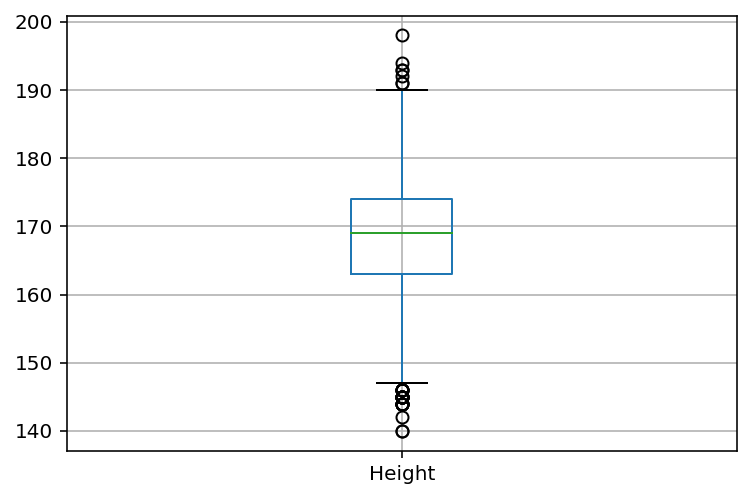

In [ ]:
df1.boxplot(column="Height")

In [ ]:
X = df1.drop('status', axis=1)   # axis=0 for row, axis=1 for column
y = df1['status']

# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (4166, 11)
y_train (4166,)
X_test (1042, 11)
y_test (1042,)


**bold text**# K48 ,c45, j4.8


In [ ]:
def evaluate(model, X_test , y_test,modelname):
  y_pred1=model.predict(X_test)

  accuracy     = accuracy_score(y_test, y_pred1)
  confusion    = confusion_matrix(y_test, y_pred1)
  df_model1 = pd.DataFrame({  'model'        : [modelname],
                             'accuracy'     : [accuracy],
                             'timetaken'    : [time2],
                            'confusionmatrix' : [confusion]
                            
                                }) 
  return df_model1

In [ ]:
from sklearn import linear_model,svm, tree
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
model1= linear_model.LinearRegression(fit_intercept=True)
svr_poly = svm.SVR(kernel='linear', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)
dtree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=0.13, random_state=3)
sv=svm.SVC(C=10,kernel='linear')

In [ ]:
%%time
time2=time.time()
print("base model")
base_model = RandomForestClassifier()
base_model.fit(X_train, y_train)
#base_accuracy = evaluate(base_model, X_test, y_test,modelname)
model1 = evaluate(base_model,  X_test,  y_test, 'RandomForest')
model1.timetaken[0] = time.time() - time2
print("Random Forest")
print(base_model.get_params())

model1

base model
Random Forest
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
CPU times: user 813 ms, sys: 19.9 ms, total: 833 ms
Wall time: 840 ms


,model,accuracy,timetaken,confusionmatrix
0,RandomForest,0.790787,0.837708,"[[506, 0, 0, 115], [1, 1, 0, 2], [1, 0, 0, 0],..."


In [69]:
%%time
from sklearn.ensemble import ExtraTreesClassifier

time2=time.time()
print("base model")
base_model1 = ExtraTreesClassifier()
base_model1.fit(X_train, y_train)
model2 = evaluate(base_model1,  X_test,  y_test, 'Extra Tree')
model2.timetaken[0] = time.time() - time2
print("Extra Tree")
print(base_model1.get_params())

model2

base model
Extra Tree
{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
CPU times: user 468 ms, sys: 2.01 ms, total: 470 ms
Wall time: 476 ms


,model,accuracy,timetaken,confusionmatrix
0,Extra Tree,0.791747,0.473549,"[[501, 0, 0, 120], [1, 1, 0, 2], [1, 0, 0, 0],..."


In [70]:
%%time
time2=time.time()
print("base model")
base_model2 = LogisticRegression()
base_model2.fit(X_train, y_train)
model3 = evaluate(base_model2,  X_test,  y_test, 'Logistic Regression')
model3.timetaken[0] = time.time() - time2
print("Logoistic Regression")
print(base_model2.get_params())
model3

base model
Logoistic Regression
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
CPU times: user 327 ms, sys: 783 µs, total: 327 ms
Wall time: 967 ms


,model,accuracy,timetaken,confusionmatrix
0,Logistic Regression,0.761996,0.95527,"[[491, 0, 0, 130], [2, 0, 0, 2], [1, 0, 0, 0],..."


In [71]:
%%time
time2=time.time()
print("base model")
base_model3 = KNeighborsClassifier()
base_model3.fit(X_train, y_train)
model4 = evaluate(base_model3,  X_test,  y_test, 'KNN')
model4.timetaken[0] = time.time() - time2
print("KNN")
print(base_model3.get_params())

model4

base model
KNN
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
CPU times: user 95 ms, sys: 622 µs, total: 95.6 ms
Wall time: 192 ms


,model,accuracy,timetaken,confusionmatrix
0,KNN,0.74952,0.190383,"[[462, 0, 0, 159], [2, 0, 0, 2], [0, 0, 0, 1],..."


In [72]:
%%time
time2=time.time()
print("base model")
base_model4 = LinearSVC()
base_model4.fit(X_train, y_train)
model5 = evaluate(base_model4,  X_test,  y_test, 'LinearSVC')
model5.timetaken[0] = time.time() - time2
print("LinearSVC")
print(base_model4.get_params())

model5

base model
LinearSVC
{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
CPU times: user 860 ms, sys: 0 ns, total: 860 ms
Wall time: 861 ms


,model,accuracy,timetaken,confusionmatrix
0,LinearSVC,0.758157,0.859241,"[[454, 0, 0, 167], [2, 0, 0, 2], [0, 0, 0, 1],..."


In [73]:
%%time
time2=time.time()
print("base model")
base_model5 = GaussianNB()
base_model5.fit(X_train, y_train)
model6 = evaluate(base_model5,  X_test,  y_test, 'GaussianNB')
model6.timetaken[0] = time.time() - time2
print("GaussianNB")
print(base_model5.get_params())

model6

base model
GaussianNB
{'priors': None, 'var_smoothing': 1e-09}
CPU times: user 14.6 ms, sys: 0 ns, total: 14.6 ms
Wall time: 27 ms


,model,accuracy,timetaken,confusionmatrix
0,GaussianNB,0.735125,0.024683,"[[456, 0, 0, 165], [2, 0, 0, 2], [1, 0, 0, 0],..."


In [74]:
%%time
time2=time.time()
print("base model")
base_model6=SVC()
base_model6.fit(X_train, y_train)
model7 = evaluate(base_model6,  X_test,  y_test, 'SVC')
model7.timetaken[0] = time.time() - time2
print("SVC")
print(base_model6.get_params())

model7

base model
SVC
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
CPU times: user 749 ms, sys: 16.8 ms, total: 766 ms
Wall time: 772 ms


,model,accuracy,timetaken,confusionmatrix
0,SVC,0.757198,0.771097,"[[480, 0, 0, 141], [2, 0, 0, 2], [1, 0, 0, 0],..."


In [76]:
%%time
time2=time.time()
print("base model")
base_model7=DecisionTreeClassifier()
base_model7.fit(X_train, y_train)
model8 = evaluate(base_model7,  X_test,  y_test, 'Decision Tree')
model8.timetaken[0] = time.time() - time2
print("Decision Tree")
print(base_model7.get_params())

model8

base model
Decision Tree
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
CPU times: user 33.9 ms, sys: 1.51 ms, total: 35.5 ms
Wall time: 37.7 ms


,model,accuracy,timetaken,confusionmatrix
0,Decision Tree,0.721689,0.036848,"[[452, 3, 5, 161], [2, 1, 0, 1], [0, 0, 0, 1],..."


In [77]:
df_base= pd.concat([model1,model2,model3,model4,model5,model6,model7,model8],axis = 0).reset_index()
df_base.drop('index', axis=1, inplace=True)
df_base

,model,accuracy,timetaken,confusionmatrix
0,RandomForest,0.790787,0.837708,"[[506, 0, 0, 115], [1, 1, 0, 2], [1, 0, 0, 0],..."
1,Extra Tree,0.791747,0.473549,"[[501, 0, 0, 120], [1, 1, 0, 2], [1, 0, 0, 0],..."
2,Logistic Regression,0.761996,0.955270,"[[491, 0, 0, 130], [2, 0, 0, 2], [1, 0, 0, 0],..."
3,KNN,0.749520,0.190383,"[[462, 0, 0, 159], [2, 0, 0, 2], [0, 0, 0, 1],..."
4,LinearSVC,0.758157,0.859241,"[[454, 0, 0, 167], [2, 0, 0, 2], [0, 0, 0, 1],..."
5,GaussianNB,0.735125,0.024683,"[[456, 0, 0, 165], [2, 0, 0, 2], [1, 0, 0, 0],..."
6,SVC,0.757198,0.771097,"[[480, 0, 0, 141], [2, 0, 0, 2], [1, 0, 0, 0],..."
7,Decision Tree,0.721689,0.036848,"[[452, 3, 5, 161], [2, 1, 0, 1], [0, 0, 0, 1],..."


In [78]:
# libraries 
!pip install yellowbrick
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
#Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
X = df1.drop('status', axis=1)   # axis=0 for row, axis=1 for column
y = df1['status']

# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (4166, 11)
y_train (4166,)
X_test (1042, 11)
y_test (1042,)


In [80]:
classes = y.value_counts().index.tolist()
classes

[0, 3, 1, 2]

In [81]:
classifiers=[
DecisionTreeClassifier(),
SVC(),
GaussianNB(),
KNeighborsClassifier(),
LogisticRegression(),
RandomForestClassifier()]

In [82]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        Class_report(name,classes)

#Class Prediction Error
def CPE_viz():    
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CPE(name,classes)
        
#Confusion matrix
def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)
        
#ROC-AUC
def ROC_viz():    
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        ROC(name,classes)

#Precision Recall Curve
def PRC_viz():  
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        PRC(name,classes)


In [83]:
# Write function for aggregate metrics
def classifier_metrics():    
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        try: 
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('cohen_kappa_score: {0:.3f}'.format(c_k_s))
        print('log_loss: {0:.3f}'.format(log_metric))
        print('zero_one_loss: {0:.3f}'.format(zero_met))
        print('hemming_loss: {0:.3f}'.format(hl))
        print('matthews_corrcoef: {0:.3f}'.format(mc))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("------------------------------------------------------")

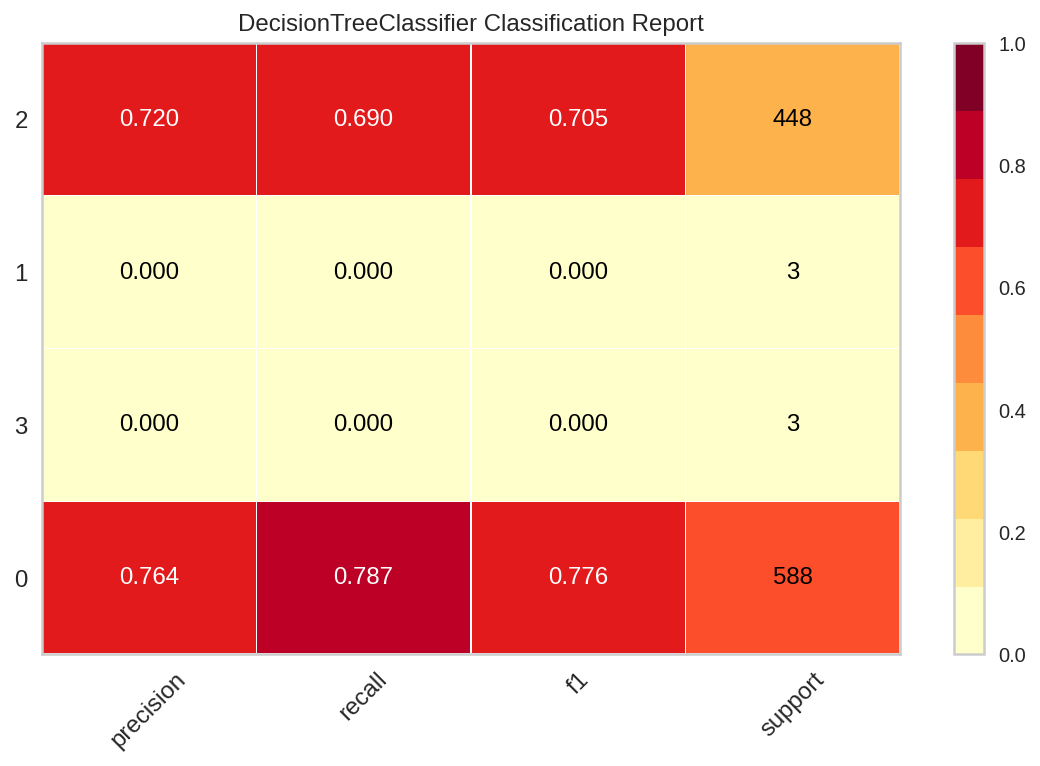

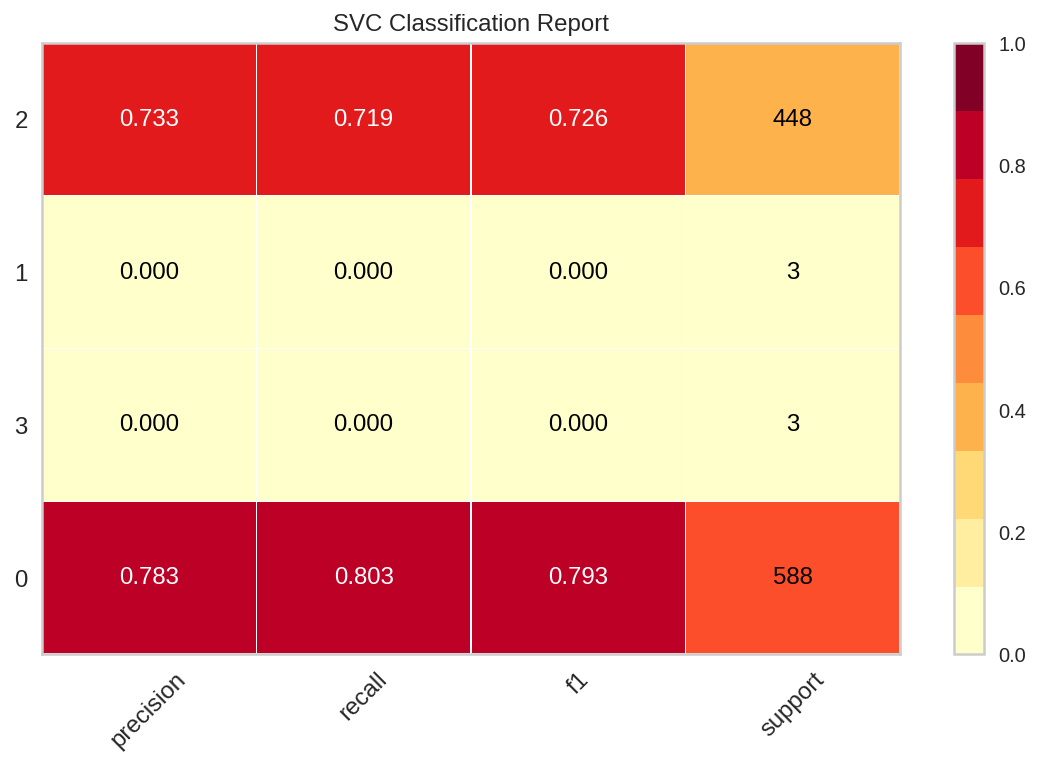

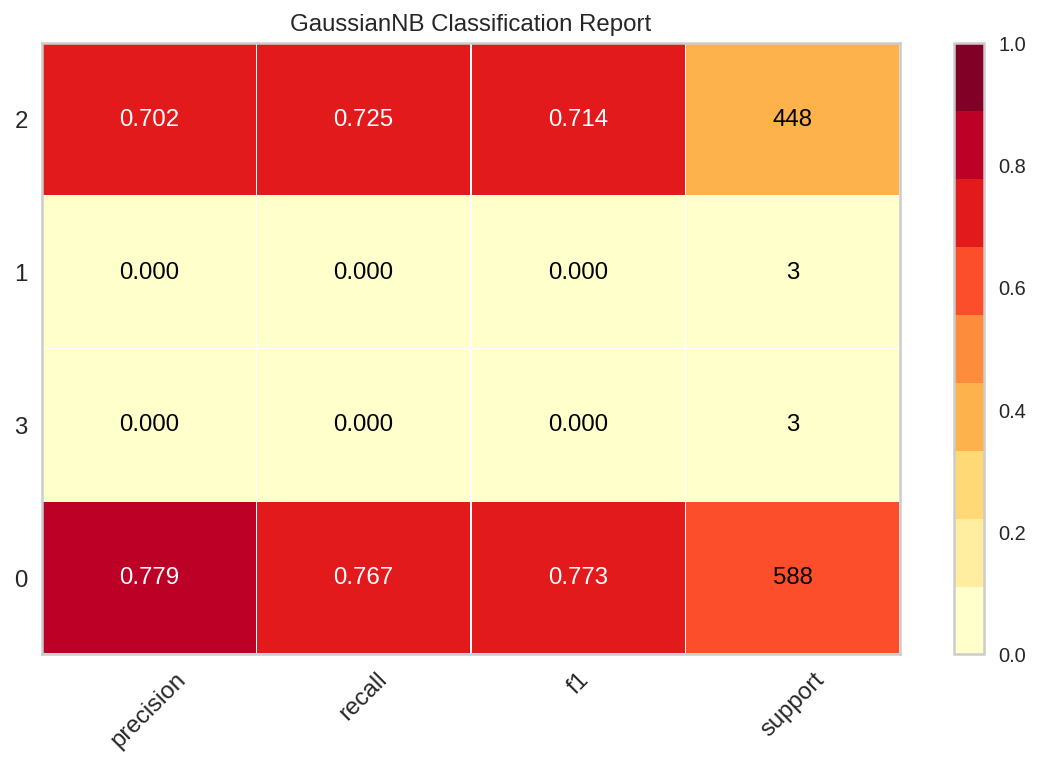

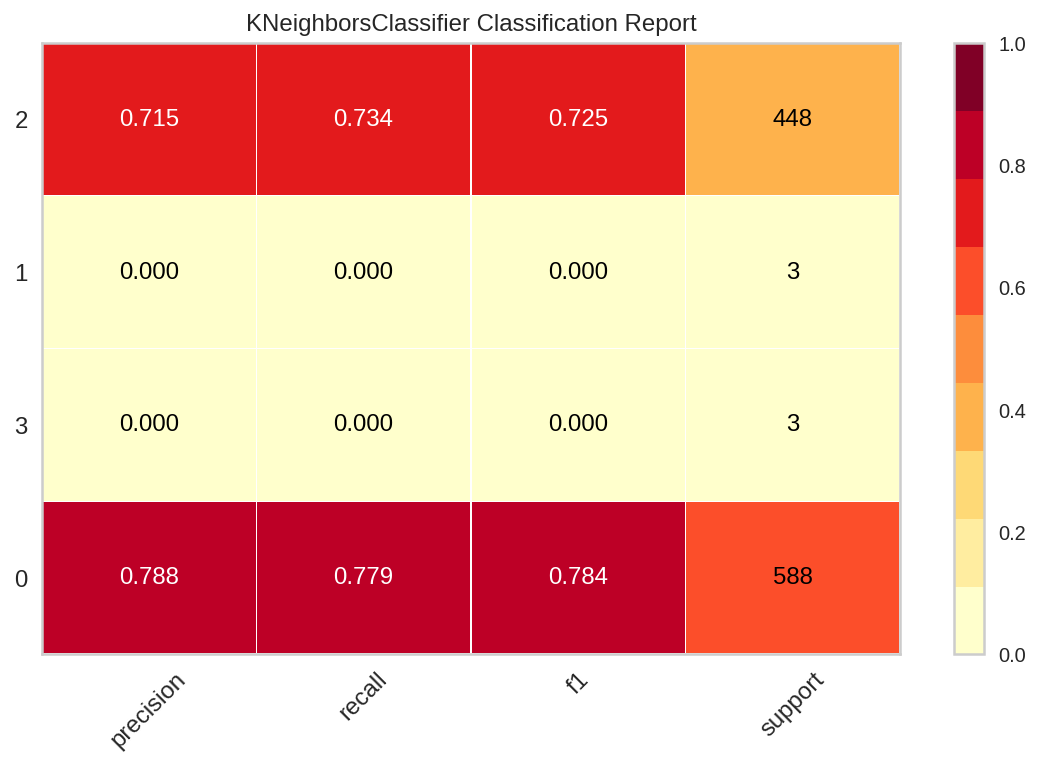

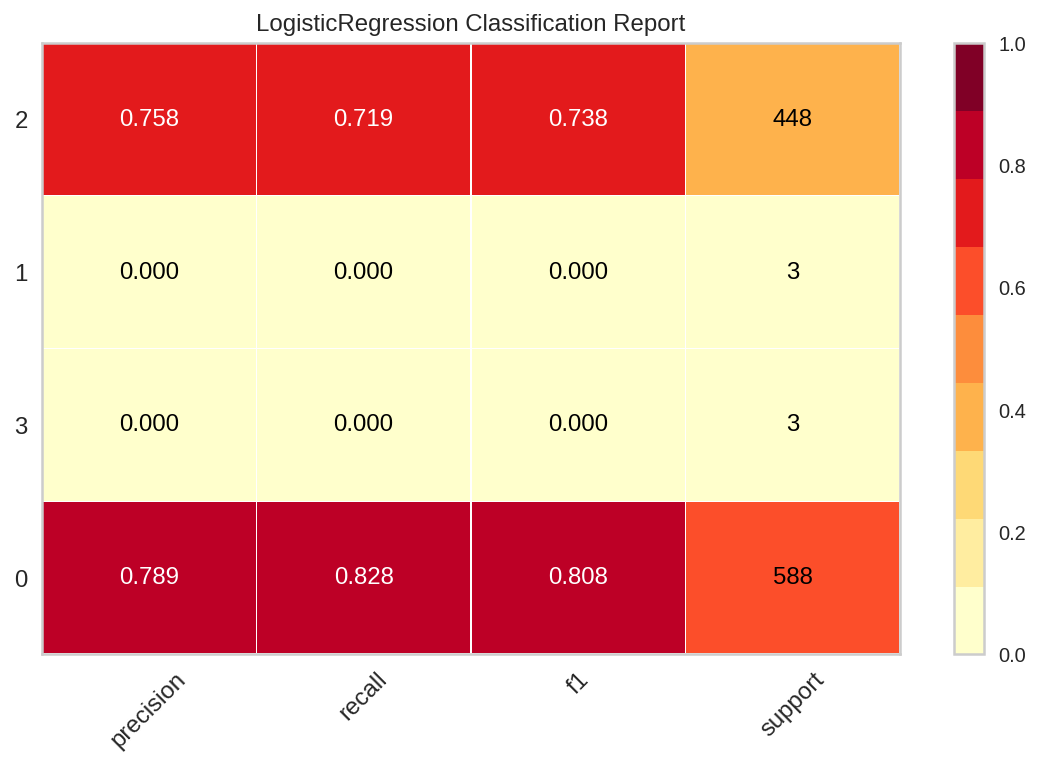

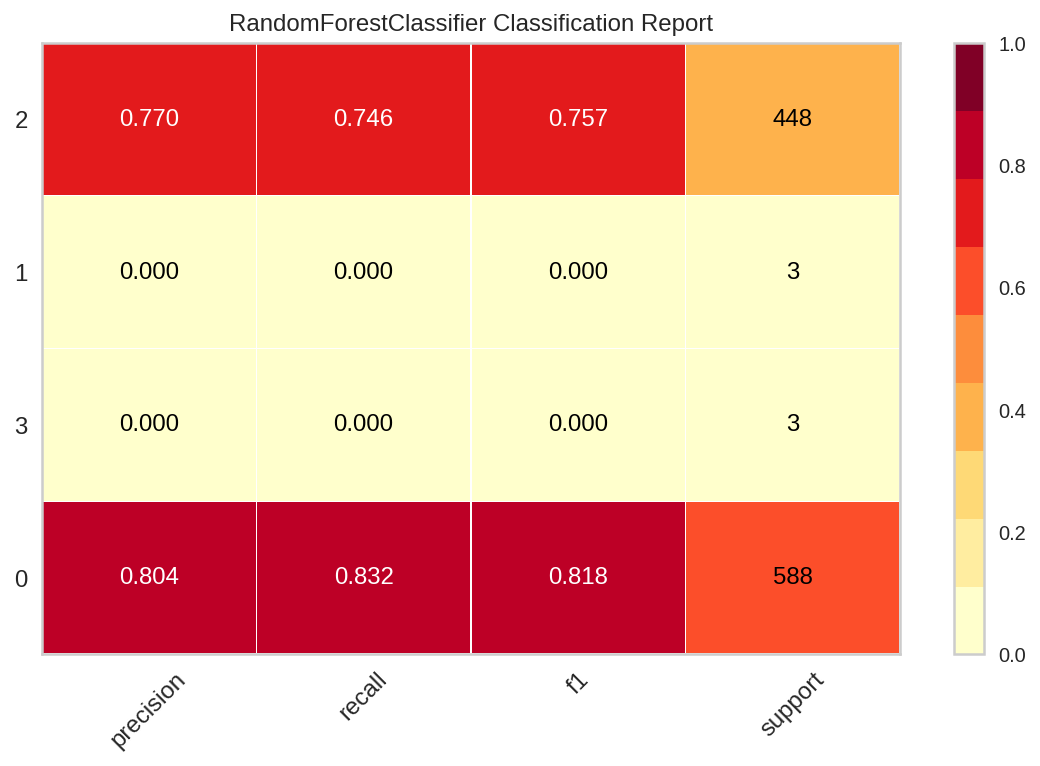

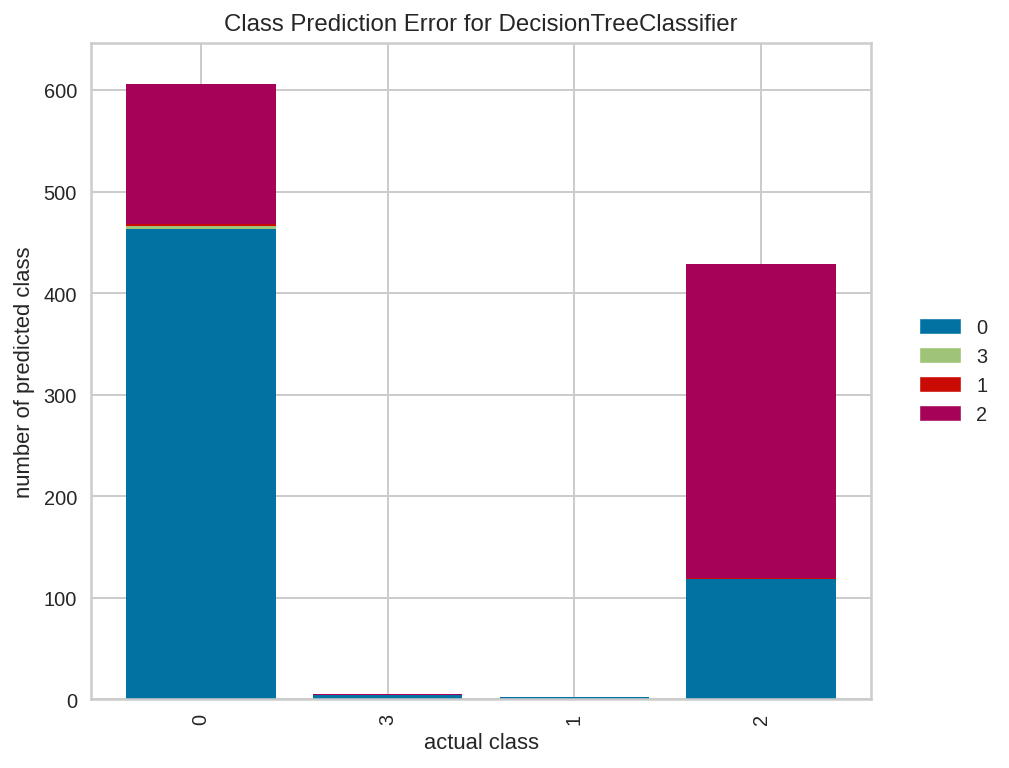

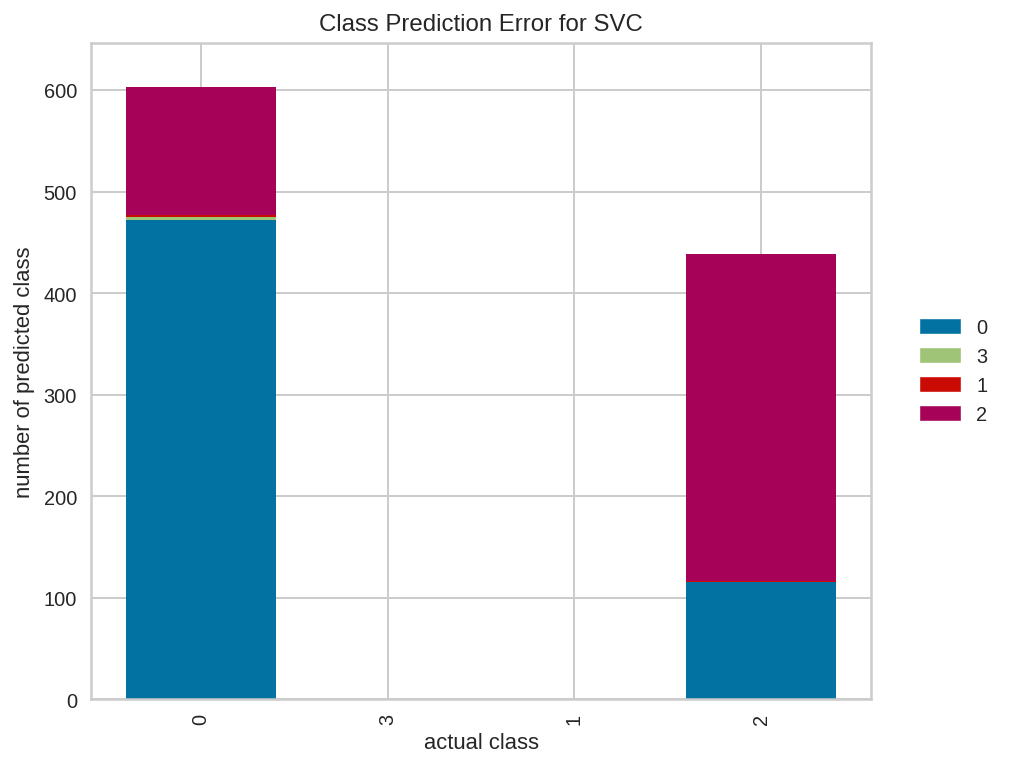

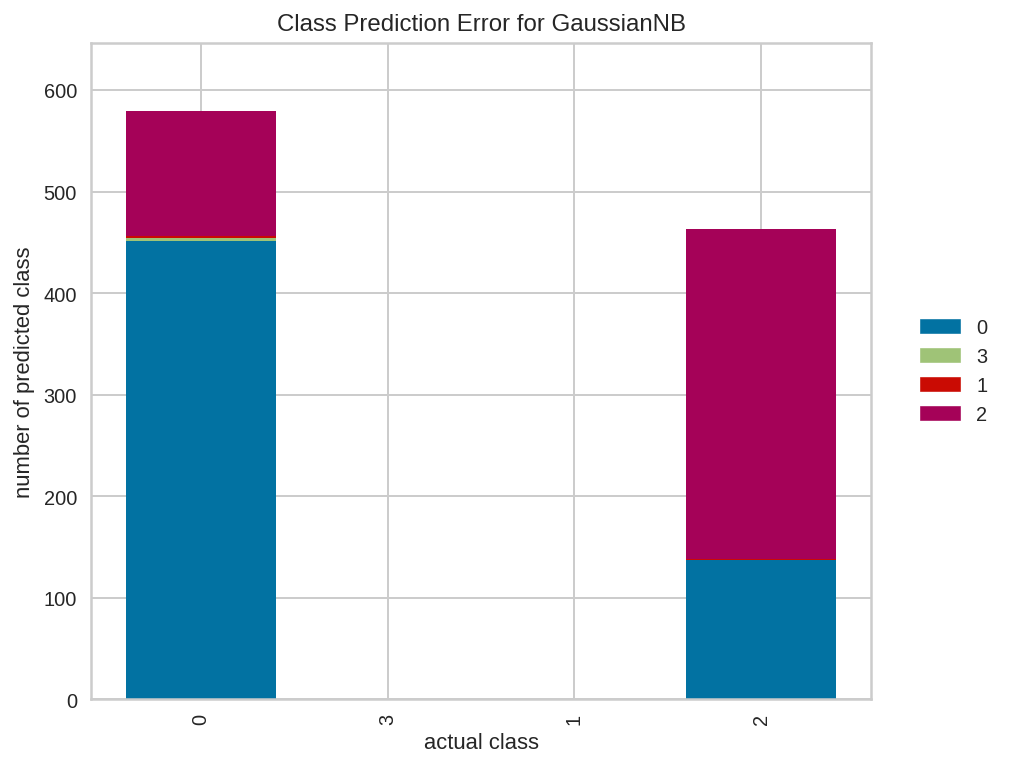

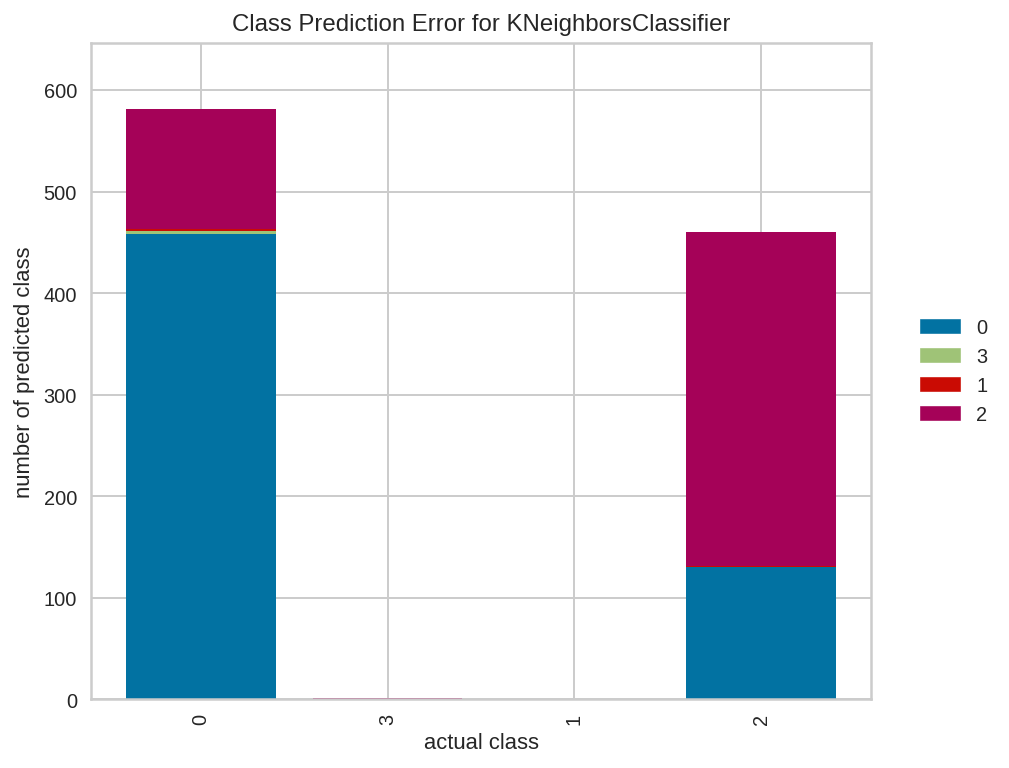

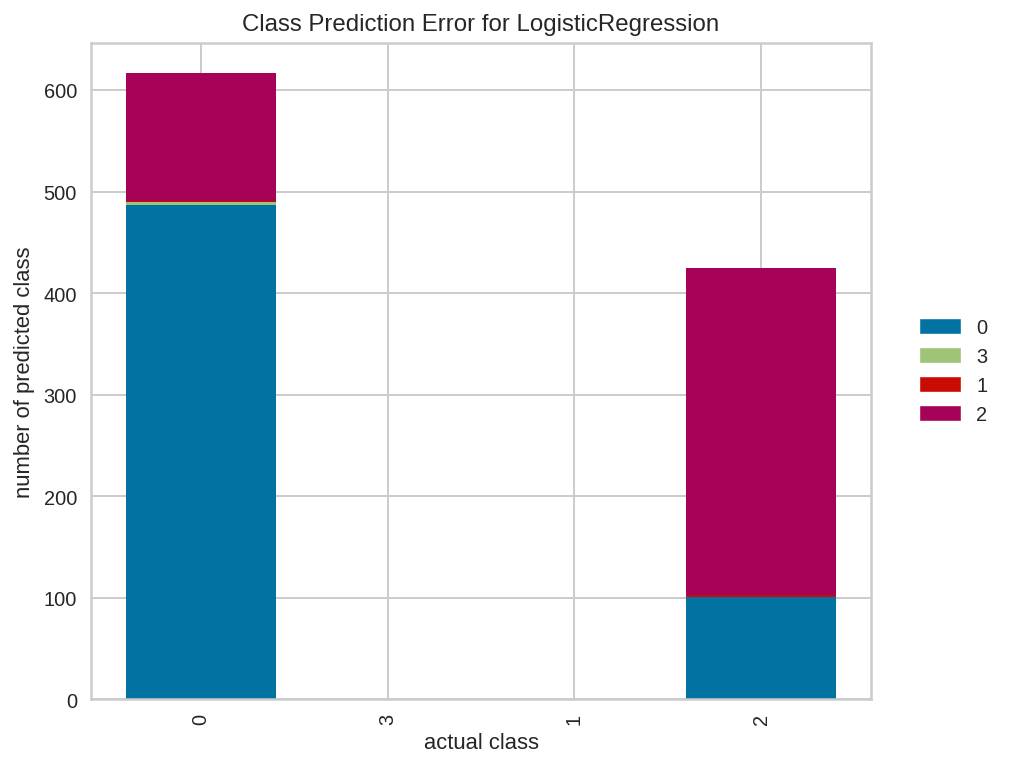

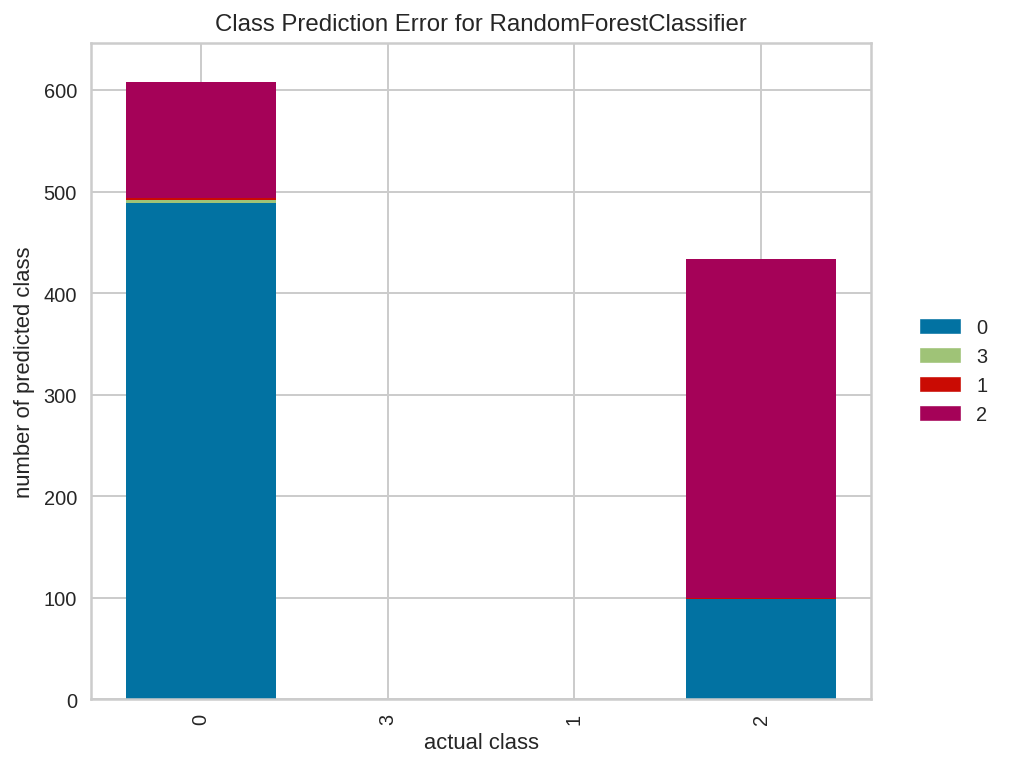

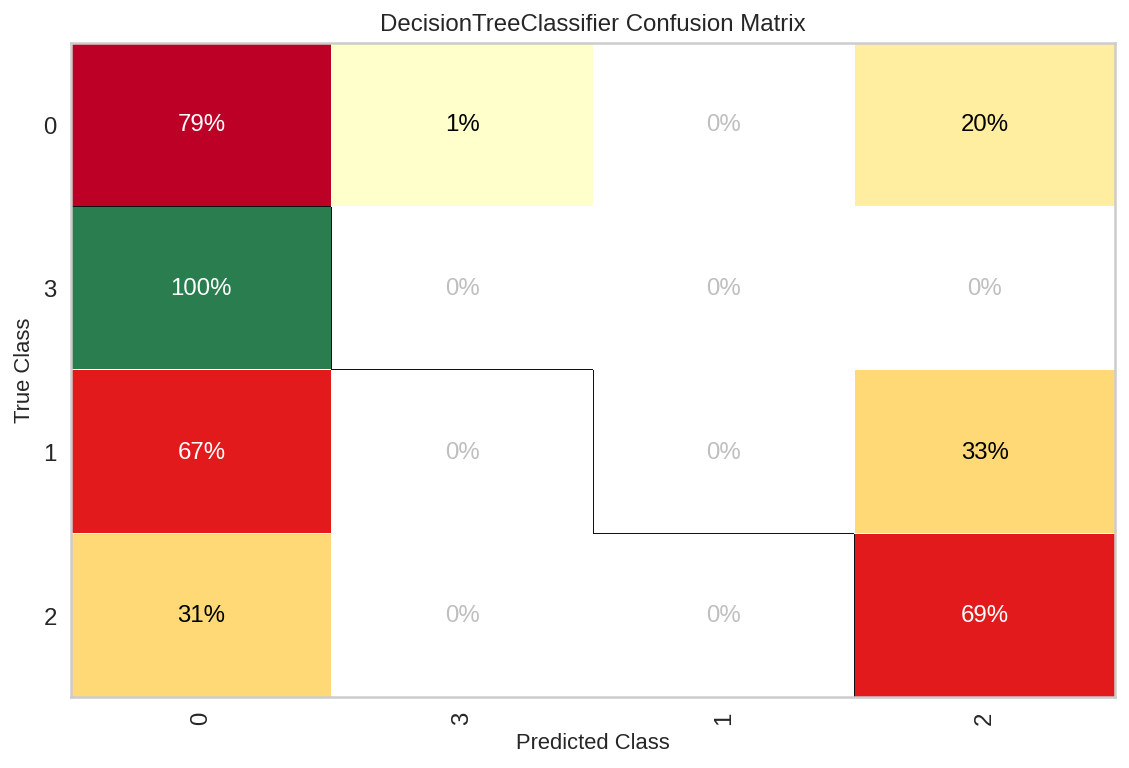

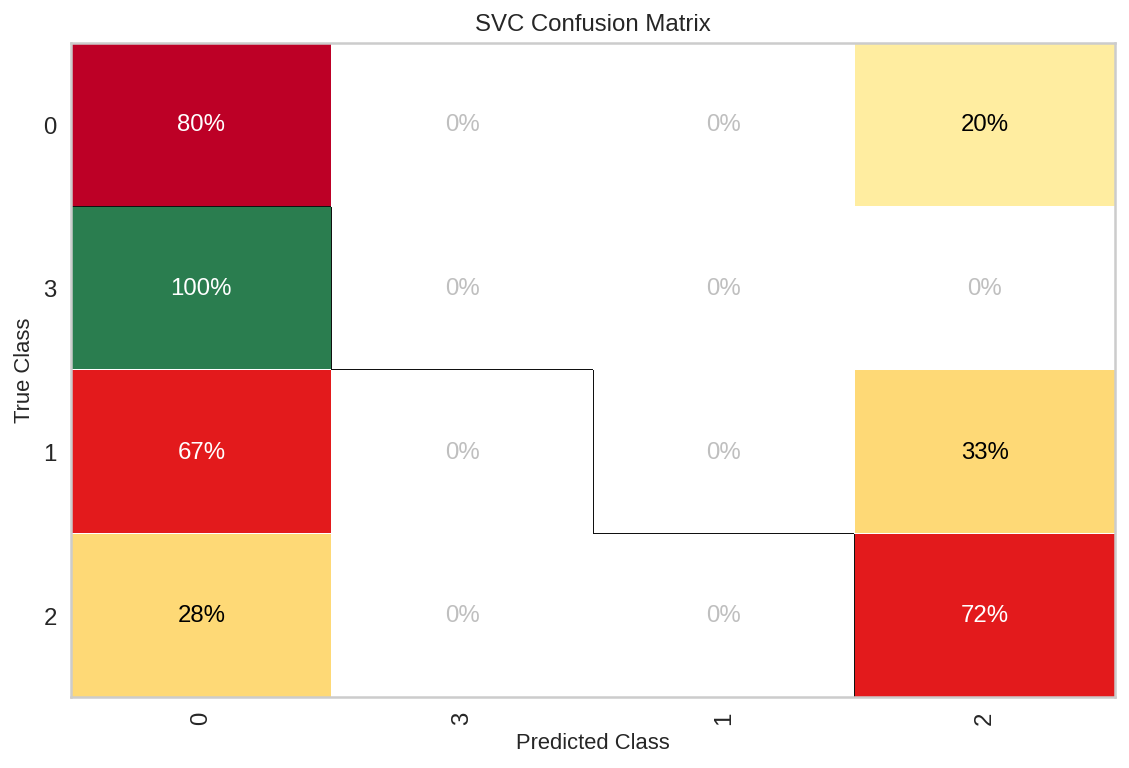

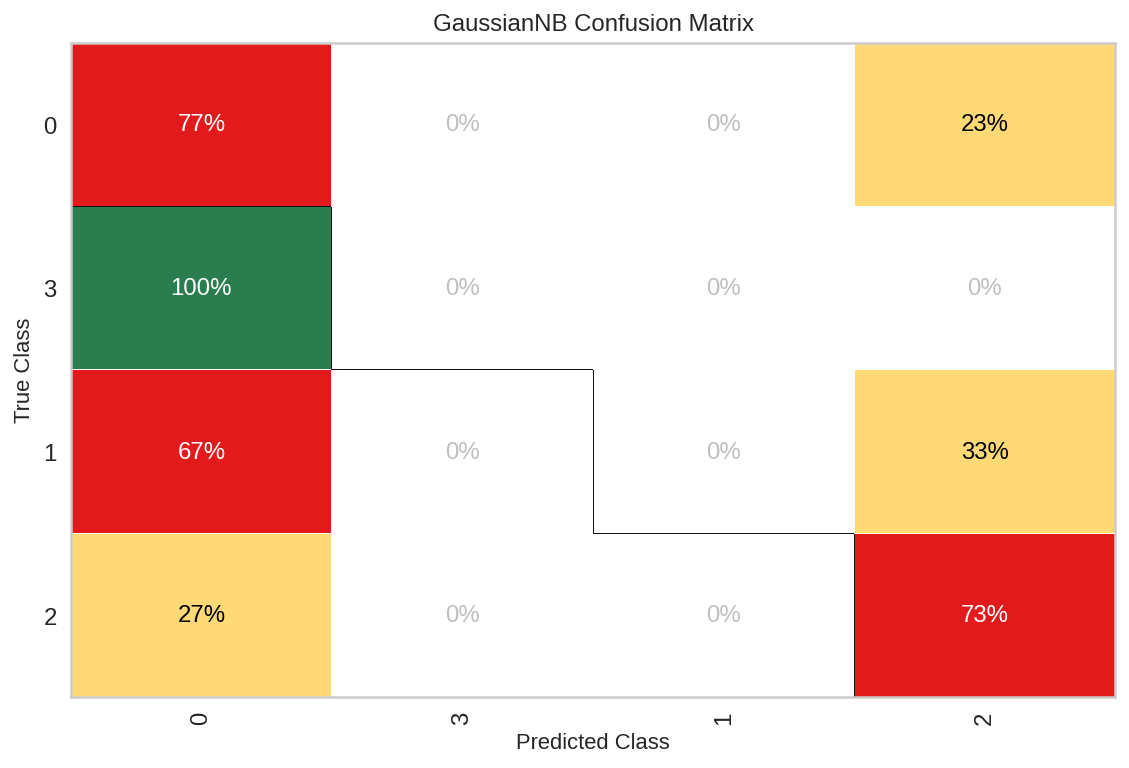

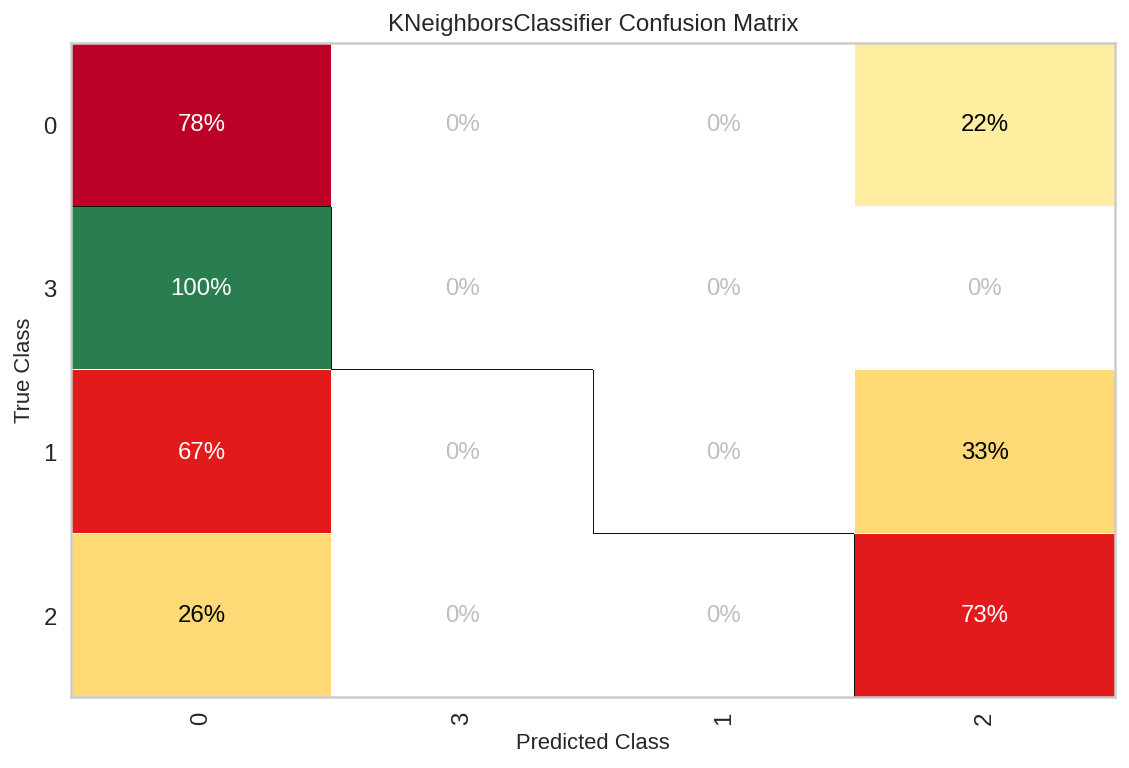

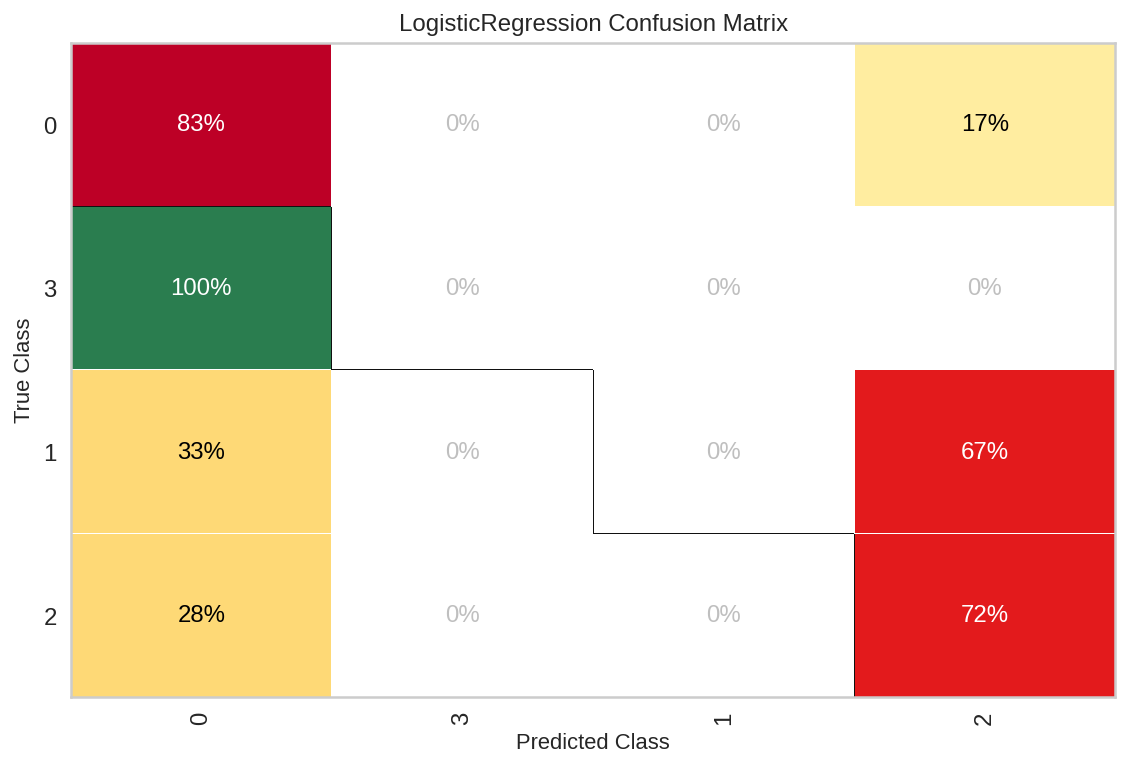

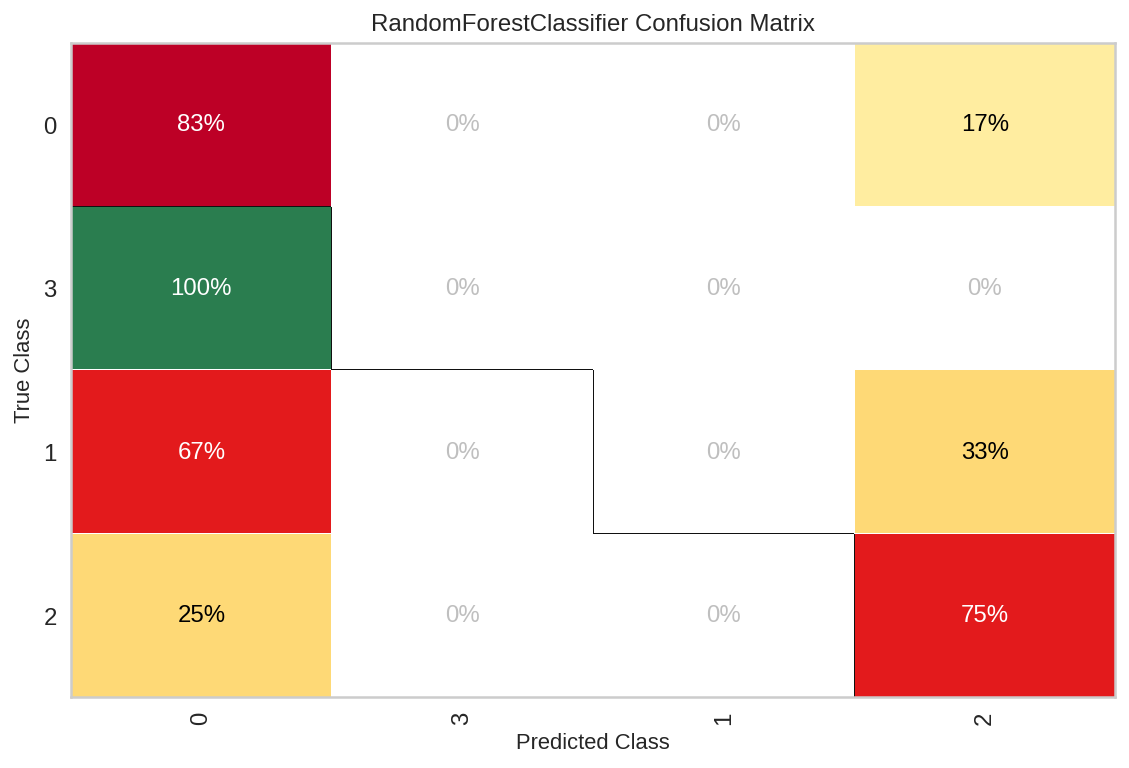

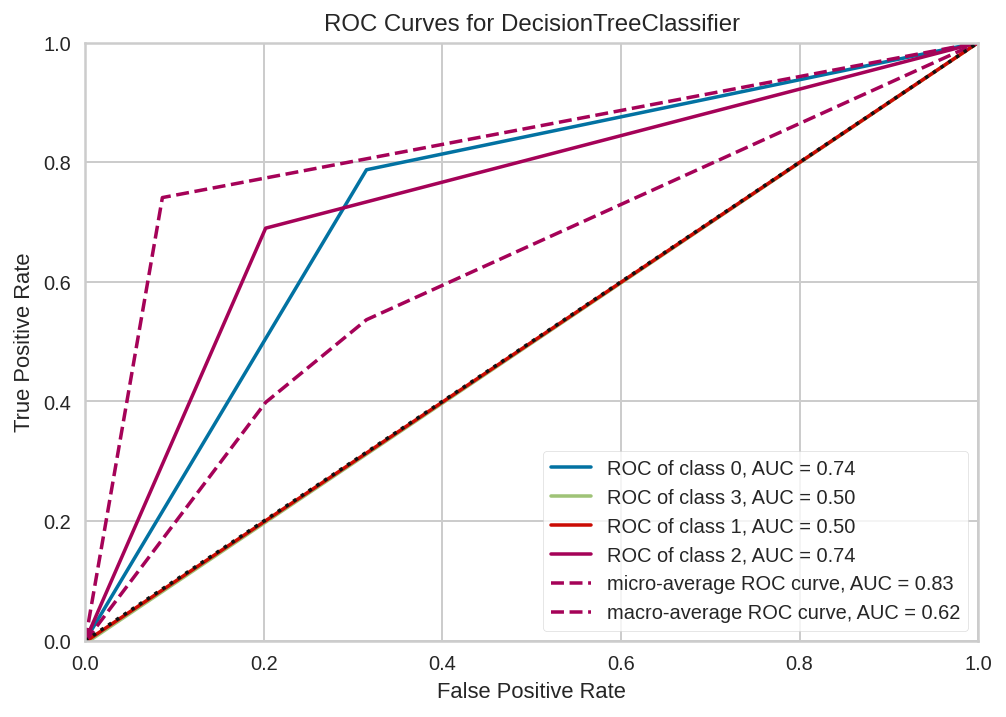

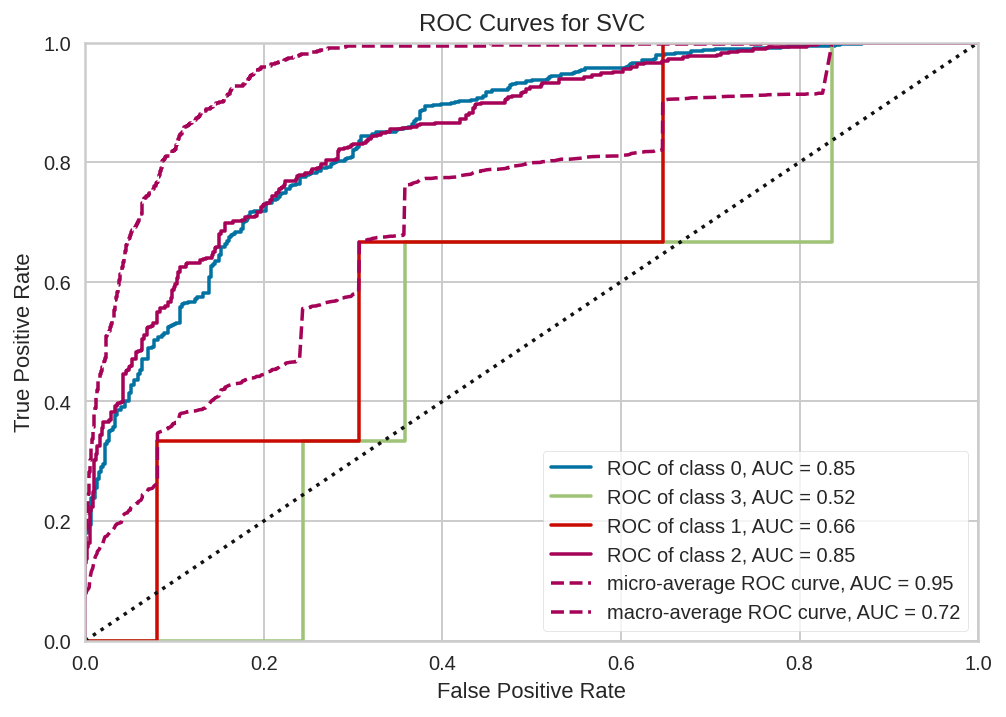

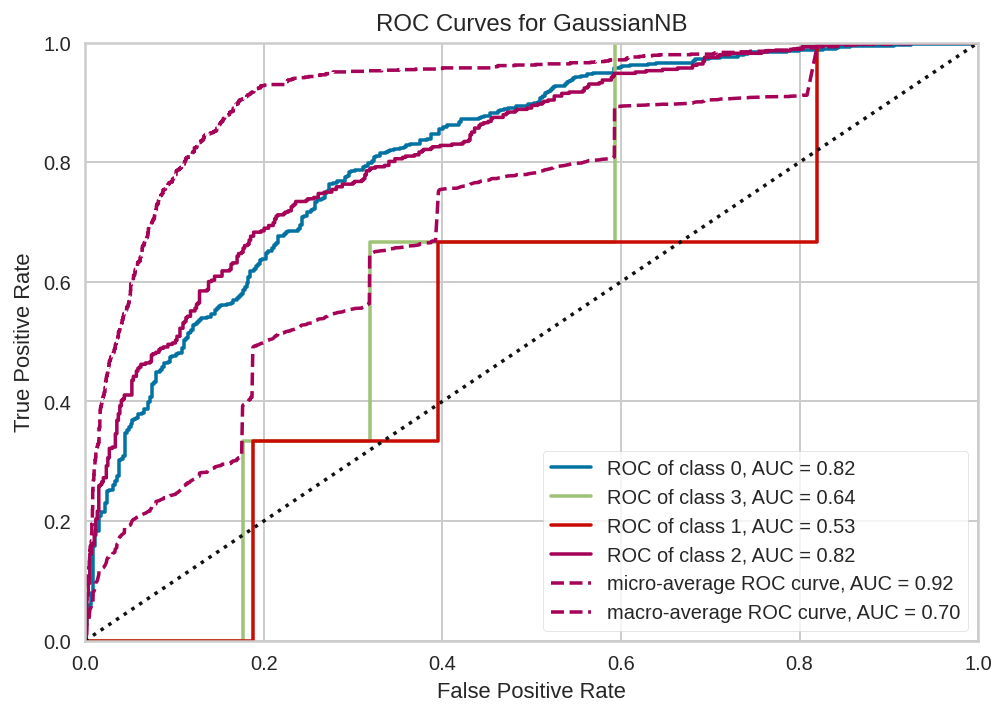

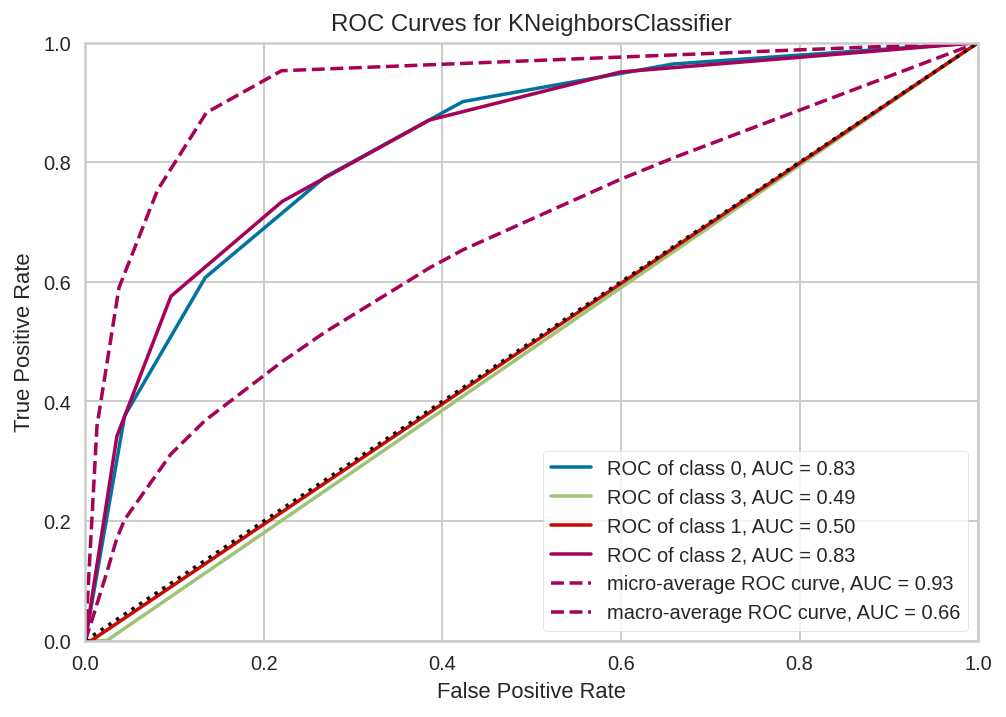

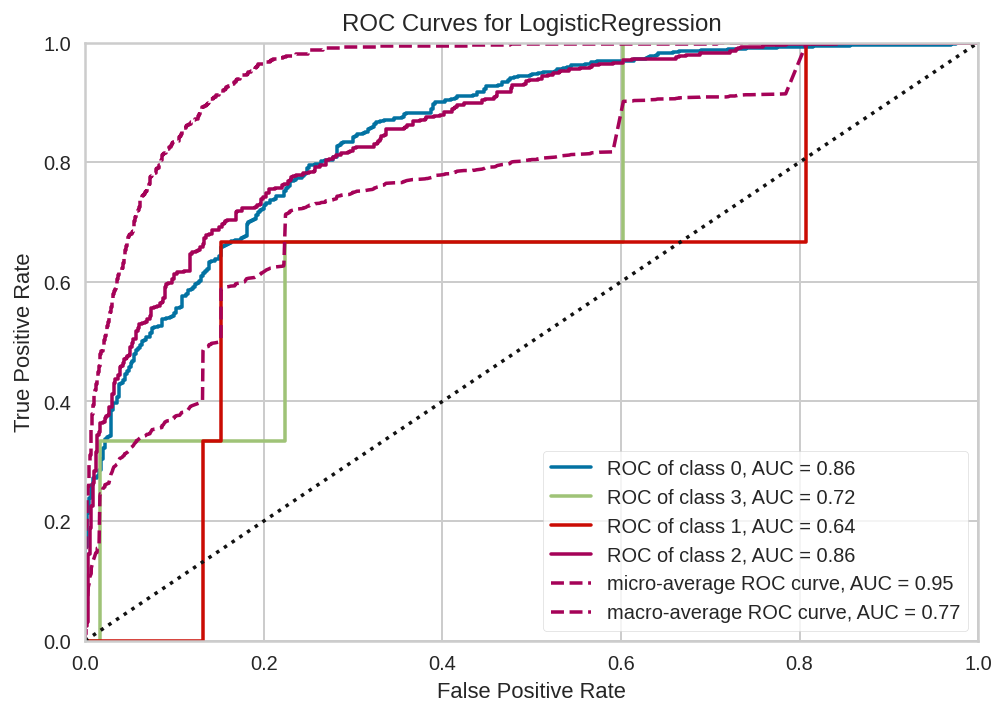

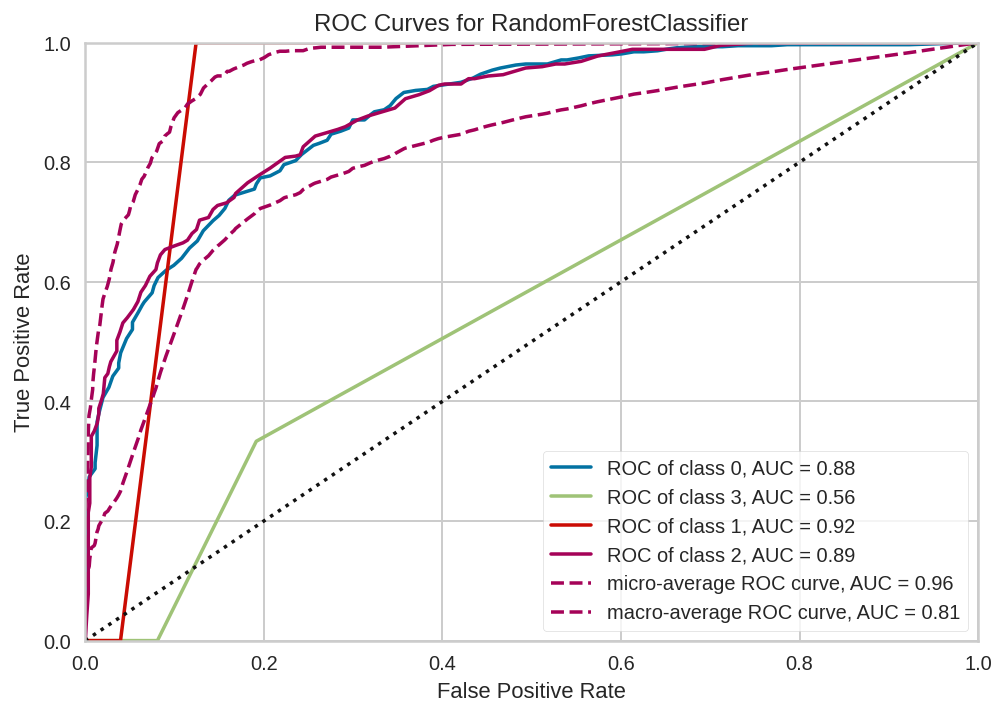

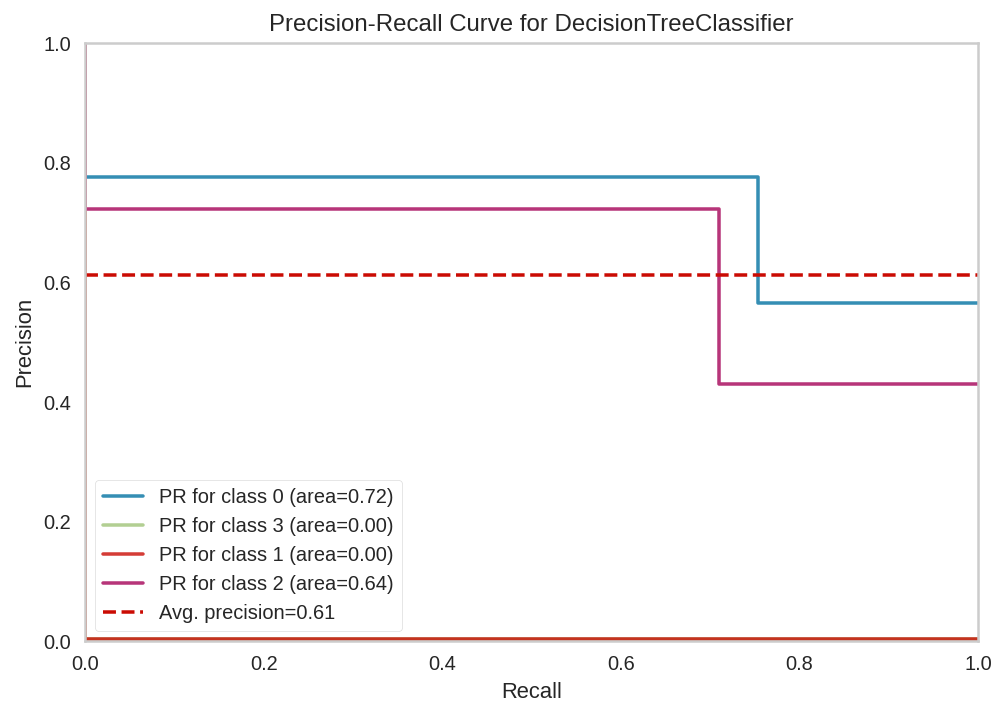

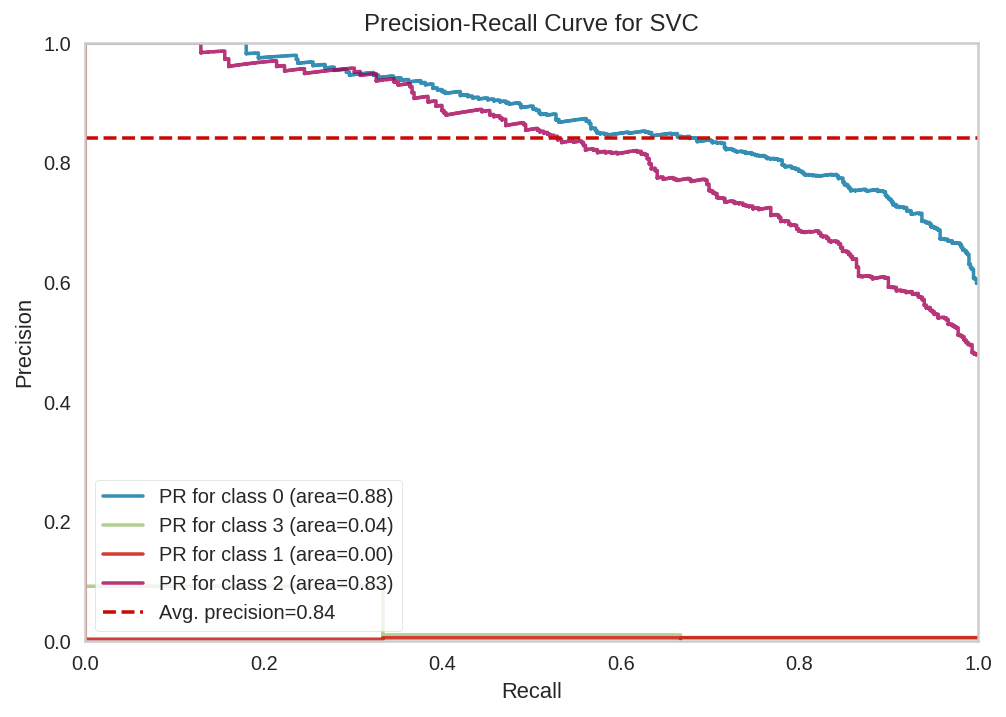

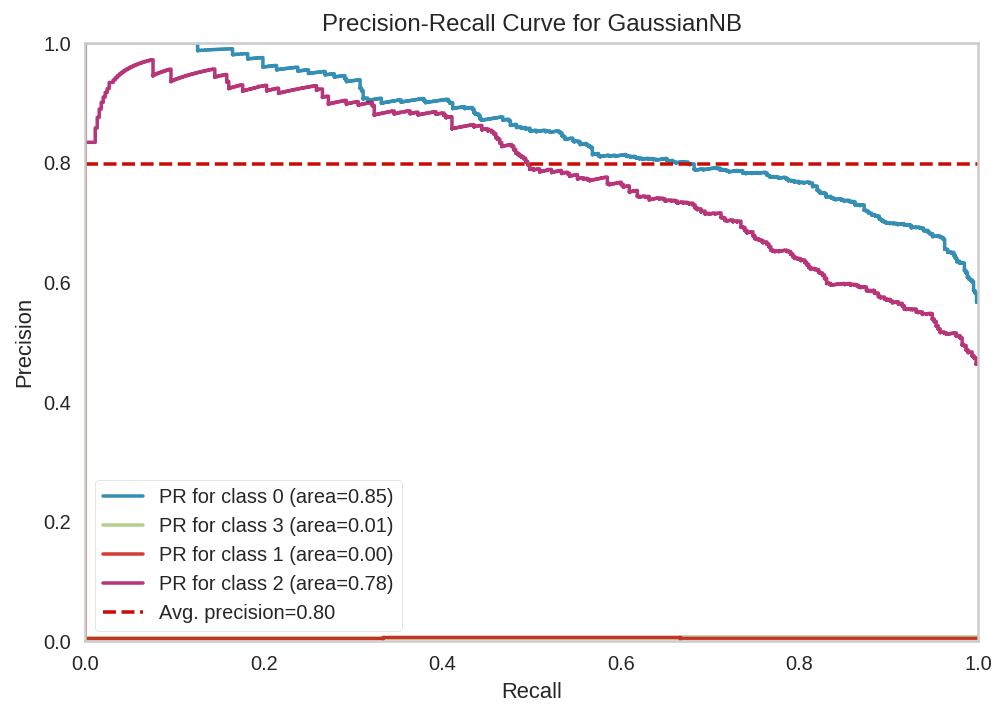

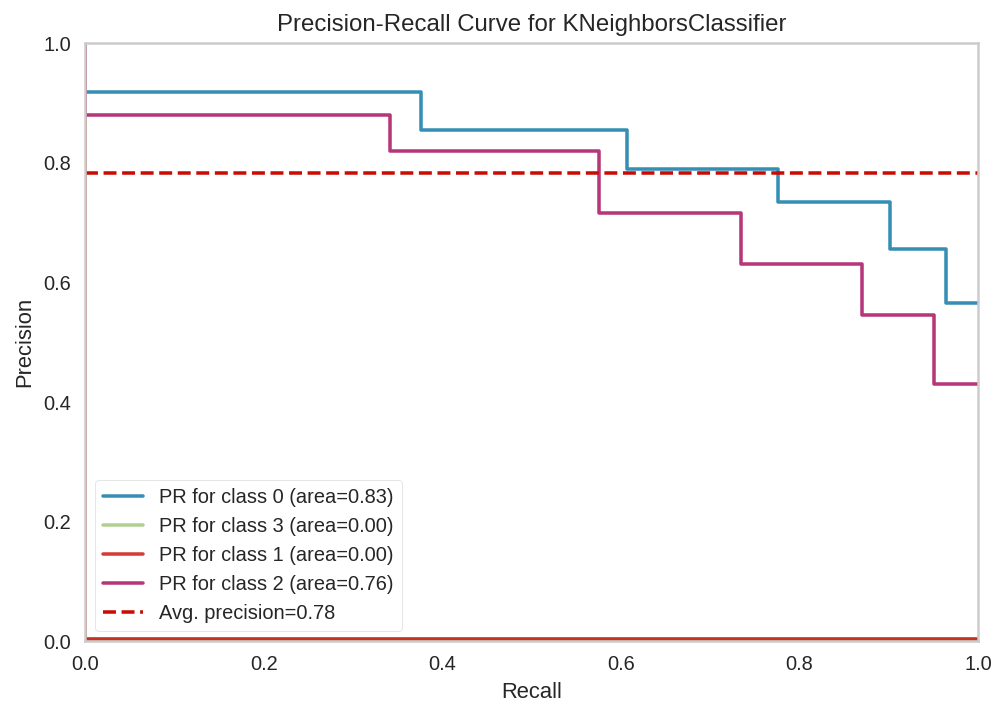

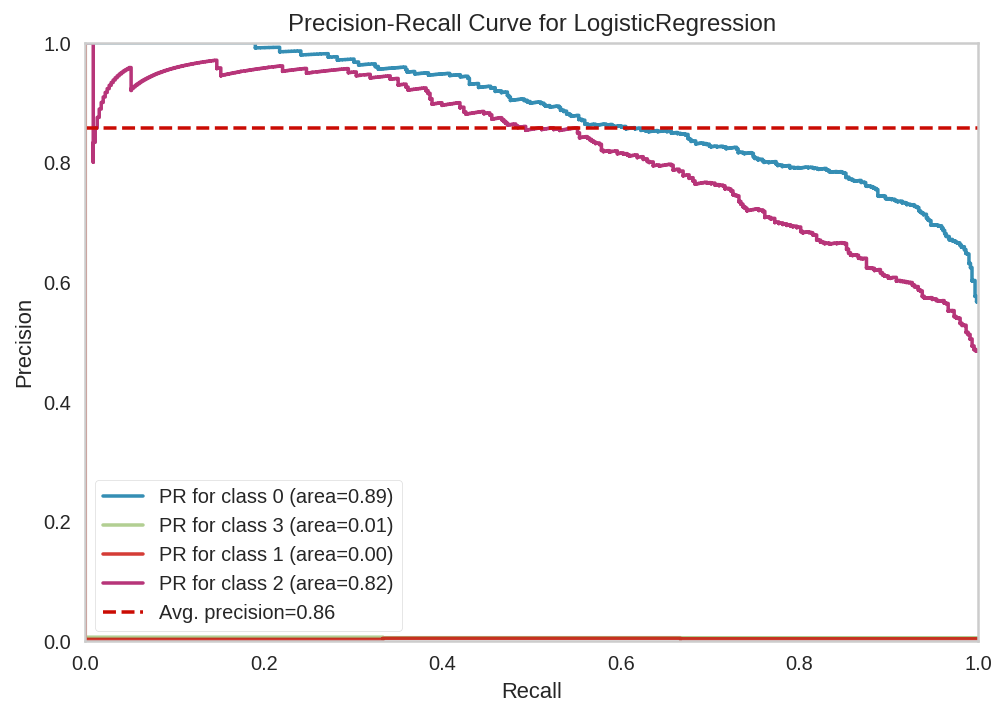

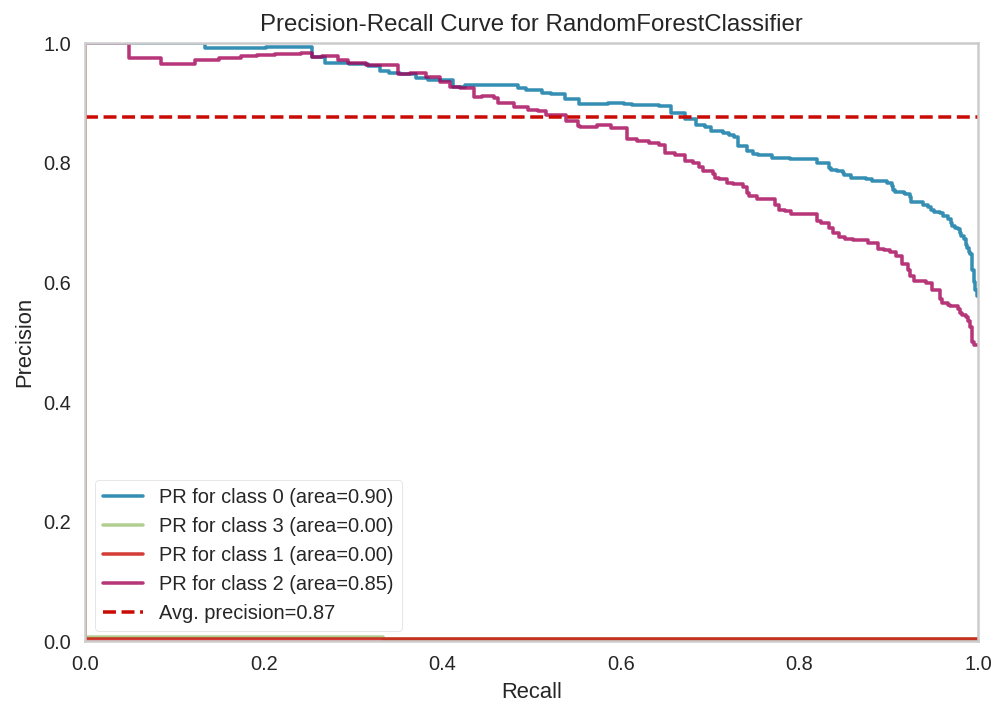

In [84]:
#deploy visualization
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]

In [85]:
#Deploy aggregate metrics  
classifier_metrics()

DecisionTreeClassifier()
cohen_kappa_score: 0.469
log_loss: 9.082
zero_one_loss: 0.263
hemming_loss: 0.263
matthews_corrcoef: 0.469

------------------------------------------------------
SVC()
cohen_kappa_score: 0.517
log_loss: 0.000
zero_one_loss: 0.238
hemming_loss: 0.238
matthews_corrcoef: 0.517

------------------------------------------------------
GaussianNB()
cohen_kappa_score: 0.485
log_loss: 0.994
zero_one_loss: 0.255
hemming_loss: 0.255
matthews_corrcoef: 0.485

------------------------------------------------------
KNeighborsClassifier()
cohen_kappa_score: 0.506
log_loss: 1.991
zero_one_loss: 0.245
hemming_loss: 0.245
matthews_corrcoef: 0.506

------------------------------------------------------
LogisticRegression()
cohen_kappa_score: 0.544
log_loss: 0.492
zero_one_loss: 0.224
hemming_loss: 0.224
matthews_corrcoef: 0.545

------------------------------------------------------
RandomForestClassifier()
cohen_kappa_score: 0.555
log_loss: 0.594
zero_one_loss: 0.219
hemming_lo

In [86]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [87]:
X = df1.drop('status', axis=1)   # axis=0 for row, axis=1 for column
y = df1['status']

# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (4166, 11)
y_train (4166,)
X_test (1042, 11)
y_test (1042,)


In [88]:
ann = models.Sequential([
        
        layers.Dense(3000, activation='relu'),
        layers.Dense(2000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
131/131 [==============================] - 23s 151ms/step - loss: 2.2950 - accuracy: 0.6783
Epoch 2/10
131/131 [==============================] - 19s 148ms/step - loss: 0.5585 - accuracy: 0.7436
Epoch 3/10
131/131 [==============================] - 19s 144ms/step - loss: 0.5711 - accuracy: 0.7352
Epoch 4/10
131/131 [==============================] - 16s 122ms/step - loss: 0.5458 - accuracy: 0.7424
Epoch 5/10
131/131 [==============================] - 15s 117ms/step - loss: 0.5343 - accuracy: 0.7489
Epoch 6/10
131/131 [==============================] - 15s 118ms/step - loss: 0.5175 - accuracy: 0.7648
Epoch 7/10
131/131 [==============================] - 17s 132ms/step - loss: 0.5256 - accuracy: 0.7537
Epoch 8/10
131/131 [==============================] - 16s 120ms/step - loss: 0.5153 - accuracy: 0.7523
Epoch 9/10
131/131 [==============================] - 15s 117ms/step - loss: 0.5203 - accuracy: 0.7549
Epoch 10/10
131/131 [==============================] - 15s 118ms/step - l

In [89]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

33/33 [==============================] - 1s 18ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.86      0.81       569
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         1
           3       0.80      0.67      0.73       466

    accuracy                           0.77      1042
   macro avg       0.39      0.38      0.38      1042
weighted avg       0.77      0.77      0.77      1042



In [90]:
ann.evaluate(X_test,y_test)

33/33 [==============================] - 1s 19ms/step - loss: 0.4920 - accuracy: 0.7706


[0.4920329749584198, 0.7706333994865417]

In [91]:
y_pred = ann.predict(X_test)
y_pred[:5]

33/33 [==============================] - 1s 18ms/step


array([[7.6339906e-01, 2.0655370e-03, 4.3657166e-03, 2.3016952e-01,
        1.6562275e-08, 1.1268476e-08, 2.1214486e-08, 2.2894925e-08,
        3.3831729e-08, 1.0162991e-08],
       [5.1119101e-01, 9.4251696e-04, 1.9244672e-03, 4.8594207e-01,
        3.5034429e-09, 2.5428826e-09, 4.8202171e-09, 3.4327718e-09,
        4.3244670e-09, 1.8140573e-09],
       [1.9340414e-01, 1.5398959e-04, 5.2267156e-04, 8.0591917e-01,
        6.4657377e-11, 4.0796165e-11, 6.2829651e-11, 4.4254350e-11,
        4.3587533e-11, 4.5395670e-11],
       [4.3942967e-01, 3.9368417e-04, 1.1332207e-03, 5.5904335e-01,
        1.2200749e-09, 5.7055860e-10, 1.6381961e-09, 1.0974838e-09,
        9.4437558e-10, 7.4508028e-10],
       [7.4704093e-01, 3.8352443e-03, 6.2373211e-03, 2.4288604e-01,
        7.2305923e-08, 5.8221584e-08, 8.9395300e-08, 9.5579544e-08,
        1.5303092e-07, 3.5163897e-08]], dtype=float32)

In [92]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:15]

[0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0]

In [93]:
y_test[:15]

3195    0
1221    3
1747    3
3630    0
503     0
1069    0
3234    3
2500    3
2411    3
2100    3
232     0
4274    0
732     3
4146    0
2635    0
Name: status, dtype: int64

In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_classes)
cm

array([[492,   0,   0,  77],
       [  5,   0,   0,   1],
       [  1,   0,   0,   0],
       [155,   0,   0, 311]])

Text(87.0, 0.5, 'Truth')

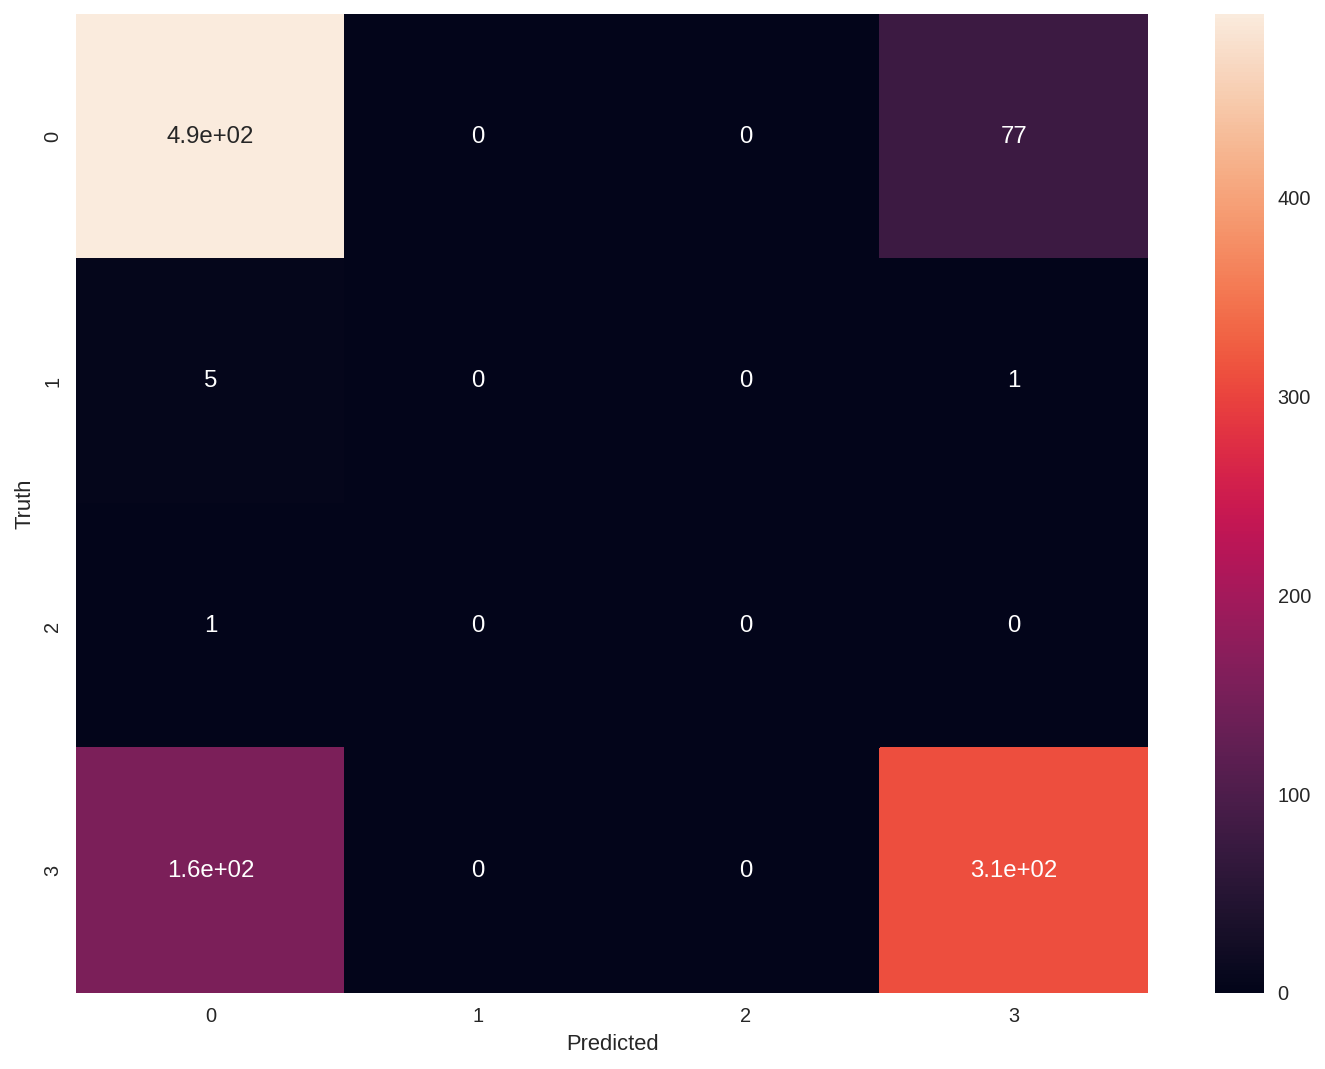

In [95]:
import seaborn as sn
plt.figure(figsize = (12,9))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')